In [1]:
# import the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns or rows

pd.set_option('display.max_columns',None)

# pd.set_option('display.max_rows',None)


df=pd.read_csv(r'./Global_Superstore2.csv', encoding='latin-1')

In [2]:
df.head()

Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  \
0       Rick Hansen     Consumer  New York City         New York   
1     Justin Ritter    Corporate     Wollongong  New South Wales   
2      Craig Reiter     Consumer       Brisbane       Queensland   
3  Katherine Murray  Home Office         Berlin           Berlin   
4       Rick Hansen     Consumer          Dakar            Dakar   

         Country  Postal Code  Market   Region        Product ID    Category  \
0  United States      10024.0      US     East   TEC-AC-10003033  Technology   
1      Australia          NaN    APAC  Oceania   FUR-CH-10003950   Furniture   
2      Australia          NaN    APAC  Oceania   TEC-PH-10004664  Technology   
3        Germany          NaN      EU  Central   TEC-PH-10004583  Technology   
4        Senegal          NaN  Africa   Africa  TEC-SHA-10000501  Technology   

  Sub-Category                                       Product Name     Sales  \
0  Accessories  Plantronics CS510 - Over-the-Head monaural Wir...  2309.650   
1       Chairs          Novimex Executive Leather Armchair, Black  3709.395   
2       Phones                  Nokia Smart Phone, with Caller ID  5175.171   
3       Phones                     Motorola Smart Phone, Cordless  2892.510   
4      Copiers                     Sharp Wireless Fax, High-Speed  2832.960   

   Quantity  Discount    Profit  Shipping Cost Order Priority  
0         7       0.0  762.1845         933.57       Critical  
1         9       0.1 -288.7650         923.63       Critical  
2         9       0.1  919.9710         915.49         Medium  
3         5       0.1  -96.5400         910.16         Medium  
4         8       0.0  311.5200         903.04       Critical

In [ ]:
# Generating 'gender' new variable from 'Customer Name' 

In [2]:
def add_gender_column(df):
    # Read male and female names from CSV files into DataFrames
    male_names_df = pd.read_csv('male.csv')
    female_names_df = pd.read_csv('female.csv')
    
    # Convert DataFrames to sets for faster lookup
    male_names_set = set(male_names_df['Column1'])
    female_names_set = set(female_names_df['Column1'])
    
    # Function to determine gender based on first name
    def get_gender(full_name):
        # Extract the first name from the full name
        first_name = full_name.split()[0]

        # Check if the first name is in the male or female names set
        if first_name in male_names_set:
            return 'M'
        elif first_name in female_names_set:
            return 'F'
        else:
            return 'Unknown'
        
            # Apply the function to 'Customer Name' column to create 'gender' column
    df['gender'] = df['Customer Name'].apply(get_gender)
    
    return df

In [3]:
new_df = add_gender_column(df)

In [5]:
new_df

Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
0       32298   CA-2012-124891  31-07-2012  31-07-2012        Same Day   
1       26341    IN-2013-77878  05-02-2013  07-02-2013    Second Class   
2       25330    IN-2013-71249  17-10-2013  18-10-2013     First Class   
3       13524  ES-2013-1579342  28-01-2013  30-01-2013     First Class   
4       47221     SG-2013-4320  05-11-2013  06-11-2013        Same Day   
...       ...              ...         ...         ...             ...   
51285   29002    IN-2014-62366  19-06-2014  19-06-2014        Same Day   
51286   35398   US-2014-102288  20-06-2014  24-06-2014  Standard Class   
51287   40470   US-2013-155768  02-12-2013  02-12-2013        Same Day   
51288    9596   MX-2012-140767  18-02-2012  22-02-2012  Standard Class   
51289    6147   MX-2012-134460  22-05-2012  26-05-2012    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Consumer  New York City   
1        JR-16210     Justin Ritter    Corporate     Wollongong   
2        CR-12730      Craig Reiter     Consumer       Brisbane   
3        KM-16375  Katherine Murray  Home Office         Berlin   
4         RH-9495       Rick Hansen     Consumer          Dakar   
...           ...               ...          ...            ...   
51285    KE-16420   Katrina Edelman    Corporate           Kure   
51286    ZC-21910  Zuschuss Carroll     Consumer        Houston   
51287    LB-16795    Laurel Beltran  Home Office         Oxnard   
51288    RB-19795        Ross Baird  Home Office       Valinhos   
51289    MC-18100     Mick Crebagga     Consumer       Tipitapa   

                 State        Country  Postal Code  Market      Region  \
0             New York  United States      10024.0      US        East   
1      New South Wales      Australia          NaN    APAC     Oceania   
2           Queensland      Australia          NaN    APAC     Oceania   
3               Berlin        Germany          NaN      EU     Central   
4                Dakar        Senegal          NaN  Africa      Africa   
...                ...            ...          ...     ...         ...   
51285        Hiroshima          Japan          NaN    APAC  North Asia   
51286            Texas  United States      77095.0      US     Central   
51287       California  United States      93030.0      US        West   
51288        São Paulo         Brazil          NaN   LATAM       South   
51289          Managua      Nicaragua          NaN   LATAM     Central   

             Product ID         Category Sub-Category  \
0       TEC-AC-10003033       Technology  Accessories   
1       FUR-CH-10003950        Furniture       Chairs   
2       TEC-PH-10004664       Technology       Phones   
3       TEC-PH-10004583       Technology       Phones   
4      TEC-SHA-10000501       Technology      Copiers   
...                 ...              ...          ...   
51285   OFF-FA-10000746  Office Supplies    Fasteners   
51286   OFF-AP-10002906  Office Supplies   Appliances   
51287   OFF-EN-10001219  Office Supplies    Envelopes   
51288   OFF-BI-10000806  Office Supplies      Binders   
51289   OFF-PA-10004155  Office Supplies        Paper   

                                            Product Name     Sales  Quantity  \
0      Plantronics CS510 - Over-the-Head monaural Wir...  2309.650         7   
1              Novimex Executive Leather Armchair, Black  3709.395         9   
2                      Nokia Smart Phone, with Caller ID  5175.171         9   
3                         Motorola Smart Phone, Cordless  2892.510         5   
4                         Sharp Wireless Fax, High-Speed  2832.960         8   
...                                                  ...       ...       ...   
51285                      Advantus Thumb Tacks, 12 Pack    65.100         5   
51286  Hoover Replacement Belt for Commercial Guardsm...     0.444         1   
51287       #10- 4 

In [6]:
#Display information about the DataFrame 

new_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [7]:
#Display missing values (sum of each variable)

new_df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
gender                0
dtype: int64

In [4]:
# Remove Postal Code from new_df

new_df.drop(columns=['Postal Code'], inplace=True)

In [9]:
new_df.head()

Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  \
0       Rick Hansen     Consumer  New York City         New York   
1     Justin Ritter    Corporate     Wollongong  New South Wales   
2      Craig Reiter     Consumer       Brisbane       Queensland   
3  Katherine Murray  Home Office         Berlin           Berlin   
4       Rick Hansen     Consumer          Dakar            Dakar   

         Country  Market   Region        Product ID    Category Sub-Category  \
0  United States      US     East   TEC-AC-10003033  Technology  Accessories   
1      Australia    APAC  Oceania   FUR-CH-10003950   Furniture       Chairs   
2      Australia    APAC  Oceania   TEC-PH-10004664  Technology       Phones   
3        Germany      EU  Central   TEC-PH-10004583  Technology       Phones   
4        Senegal  Africa   Africa  TEC-SHA-10000501  Technology      Copiers   

                                        Product Name     Sales  Quantity  \
0  Plantronics CS510 - Over-the-Head monaural Wir...  2309.650         7   
1          Novimex Executive Leather Armchair, Black  3709.395         9   
2                  Nokia Smart Phone, with Caller ID  5175.171         9   
3                     Motorola Smart Phone, Cordless  2892.510         5   
4                     Sharp Wireless Fax, High-Speed  2832.960         8   

   Discount    Profit  Shipping Cost Order Priority gender  
0       0.0  762.1845         933.57       Critical      M  
1       0.1 -288.7650         923.63       Critical      M  
2       0.1  919.9710         915.49         Medium      M  
3       0.1  -96.5400         910.16         Medium      F  
4       0.0  311.5200         903.04       Critical      M

In [10]:
new_df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
gender                3
dtype: int64

In [12]:
# Display the categories from categorical variables

new_df['Sub-Category'].value_counts() 

Sub-Category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: count, dtype: int64

In [13]:
new_df['Category'].value_counts() 

Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64

In [11]:
#Display basic descriptive statistics 

new_df.describe()

Row ID         Sales      Quantity      Discount        Profit  \
count  51290.00000  51290.000000  51290.000000  51290.000000  51290.000000   
mean   25645.50000    246.490581      3.476545      0.142908     28.610982   
std    14806.29199    487.565361      2.278766      0.212280    174.340972   
min        1.00000      0.444000      1.000000      0.000000  -6599.978000   
25%    12823.25000     30.758625      2.000000      0.000000      0.000000   
50%    25645.50000     85.053000      3.000000      0.000000      9.240000   
75%    38467.75000    251.053200      5.000000      0.200000     36.810000   
max    51290.00000  22638.480000     14.000000      0.850000   8399.976000   

       Shipping Cost  
count   51290.000000  
mean       26.375915  
std        57.296804  
min         0.000000  
25%         2.610000  
50%         7.790000  
75%        24.450000  
max       933.570000

In [12]:
new_df['Sales'].describe()

count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Sales, dtype: float64

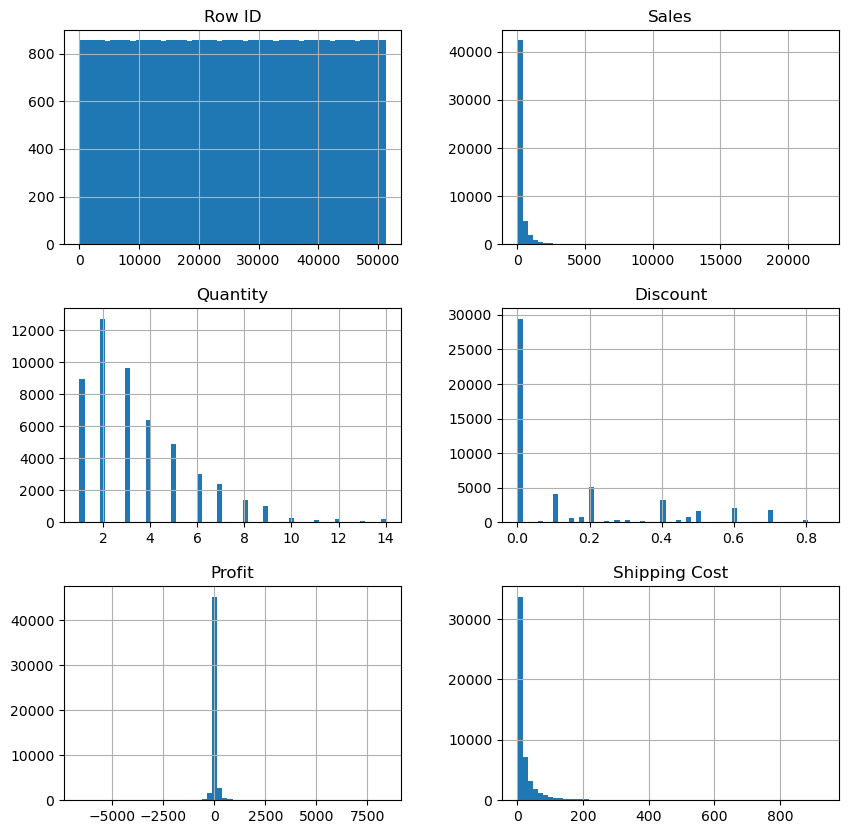

In [11]:
# Histogram for numerical variables 

new_df.hist(bins=60, figsize=(10, 10)) 
plt.show()

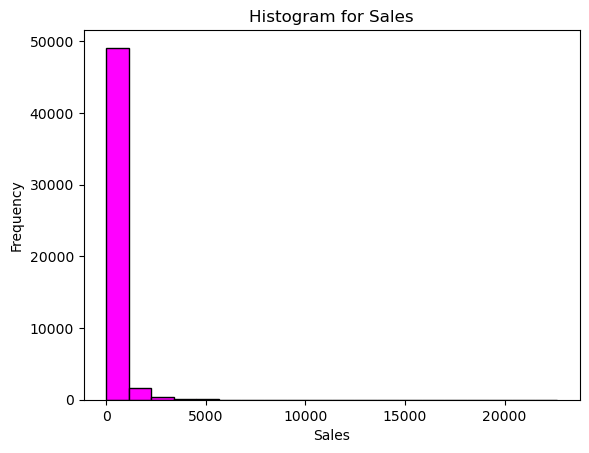

In [16]:
# Histogram for Sales

plt.hist(new_df['Sales'], bins=20, color='magenta', edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram for Sales')

plt.show()

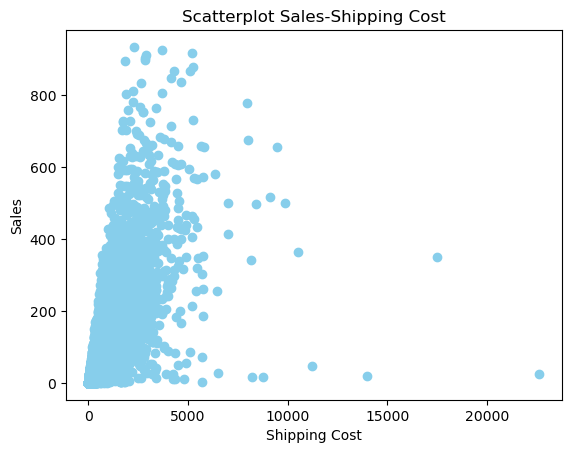

In [17]:
# Scatterplot for Sales - Shipping Cost

plt.scatter(new_df['Sales'], new_df['Shipping Cost'], color='skyblue', marker='o')
plt.xlabel('Shipping Cost')
plt.ylabel('Sales')
plt.title('Scatterplot Sales-Shipping Cost')
plt.show()

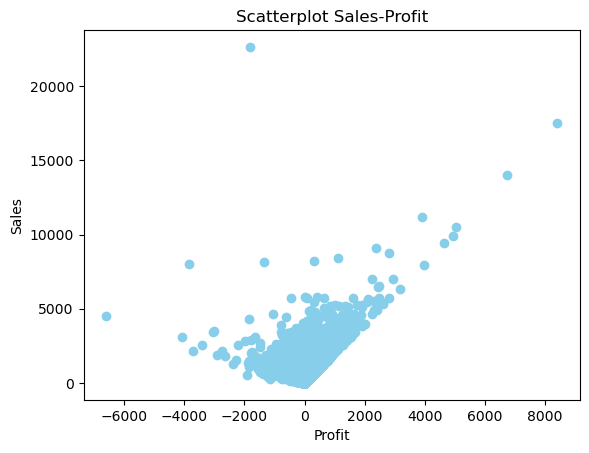

In [18]:
# Scatterplot for Sales - Profit 

plt.scatter(new_df['Profit'], new_df['Sales'], color='skyblue', marker='o')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.title('Scatterplot Sales-Profit')
plt.show()

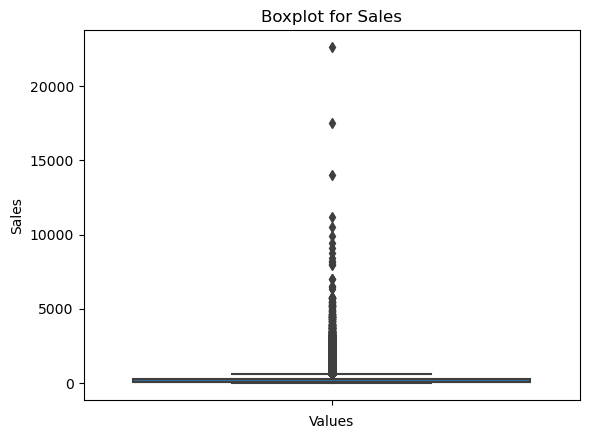

In [19]:
# Boxplot for Sales

sns.boxplot(y=new_df['Sales'])

plt.xlabel('Values')
plt.ylabel('Sales')
plt.title('Boxplot for Sales')
plt.show()

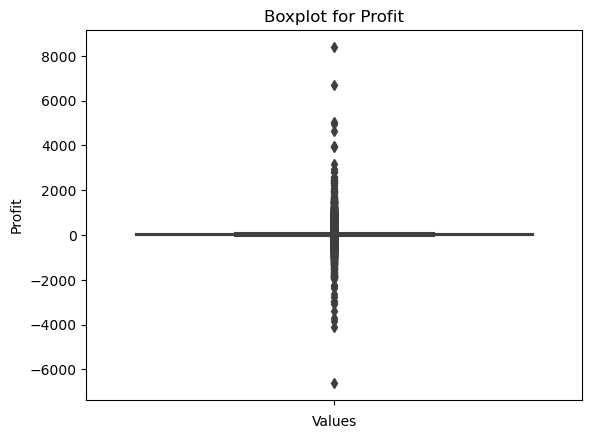

In [21]:
# Boxplot for Profit

sns.boxplot(y=new_df['Profit'])

plt.xlabel('Values')
plt.ylabel('Profit')
plt.title('Boxplot for Profit')
plt.show()

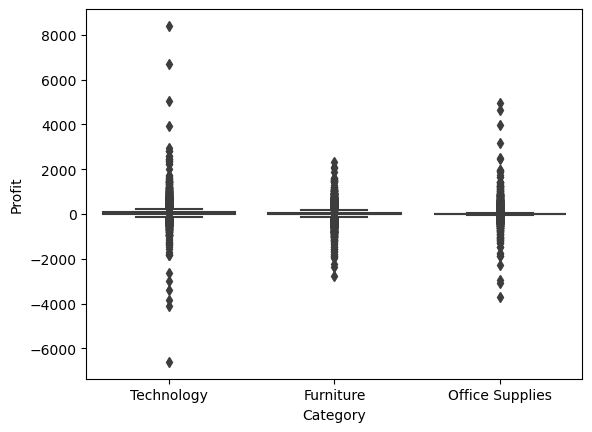

In [22]:
# Boxplot Category- Profit

sns.boxplot(x='Category', y='Profit', data=new_df)
plt.show()

<Axes: xlabel='Ship Mode', ylabel='Region'>

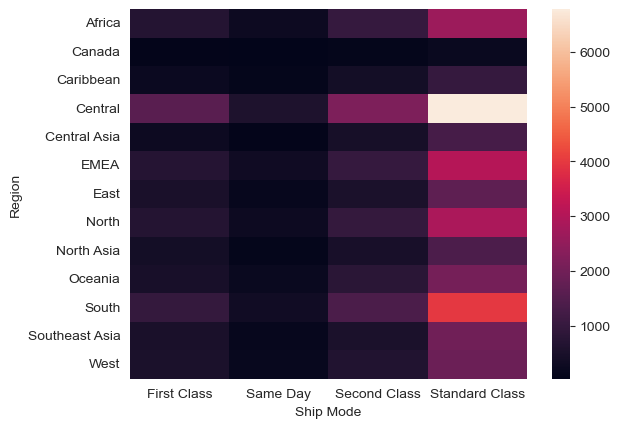

In [103]:
# cross-tabulation (crosstab) to explore relationships between multiple categorical variables.

# Region - Ship Mode 

cross_tab = pd.crosstab(new_df['Region'], new_df['Ship Mode'])
sns.heatmap(cross_tab)


In [104]:
cross_tab

Ship Mode       First Class  Same Day  Second Class  Standard Class
Region                                                             
Africa                  679       257           992            2659
Canada                   70        29            91             194
Caribbean               231        85           372            1002
Central                1593       568          2176            6780
Central Asia            252        79           440            1277
EMEA                    700       300           993            3036
East                    490       155           530            1673
North                   684       246           954            2901
North Asia              385       106           470            1377
Oceania                 455       205           779            2048
South                   958       341          1368            3978
Southeast Asia          493       145           523            1968
West                    515       185           621            1882

<Axes: xlabel='Region', ylabel='Category'>

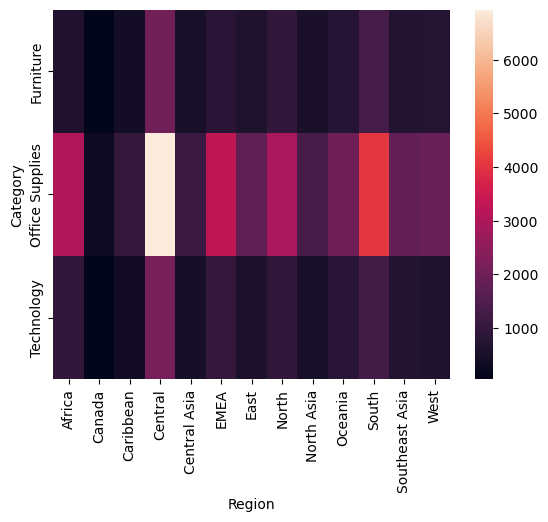

In [27]:
# Category - Region

cross_tab1 = pd.crosstab(new_df['Category'], new_df['Region'])
sns.heatmap(cross_tab1)

In [28]:
cross_tab1

Region           Africa  Canada  Caribbean  Central  Central Asia  EMEA  East  \
Category                                                                        
Furniture           631      42        376     2046           478   770   601   
Office Supplies    3045     277        973     6936          1111  3297  1712   
Technology          911      65        341     2135           459   962   535   

Region           North  North Asia  Oceania  South  Southeast Asia  West  
Category                                                                  
Furniture          945         522      742   1329             687   707  
Office Supplies   2914        1332     1961   4045            1773  1897  
Technology         926         484      784   1271             669   599

<Axes: xlabel='gender', ylabel='Sub-Category'>

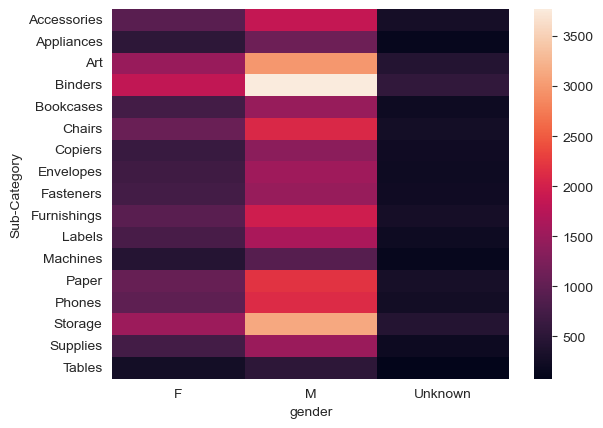

In [101]:
# Category - gender

cross_tab2 = pd.crosstab(new_df['Sub-Category'], new_df['gender'])
sns.heatmap(cross_tab2)

In [102]:
cross_tab2

gender           F     M  Unknown
Sub-Category                     
Accessories    932  1859      284
Appliances     513  1104      138
Art           1483  2976      424
Binders       1829  3769      554
Bookcases      736  1468      207
Chairs        1080  2086      268
Copiers        631  1368      224
Envelopes      682  1541      212
Fasteners      727  1467      226
Furnishings    934  1957      279
Labels         777  1622      207
Machines       448   901      137
Paper         1055  2186      297
Phones         976  2123      258
Storage       1505  3125      429
Supplies       735  1497      193
Tables         271   514       76

In [ ]:
# Calculate the frequency for categorical variables

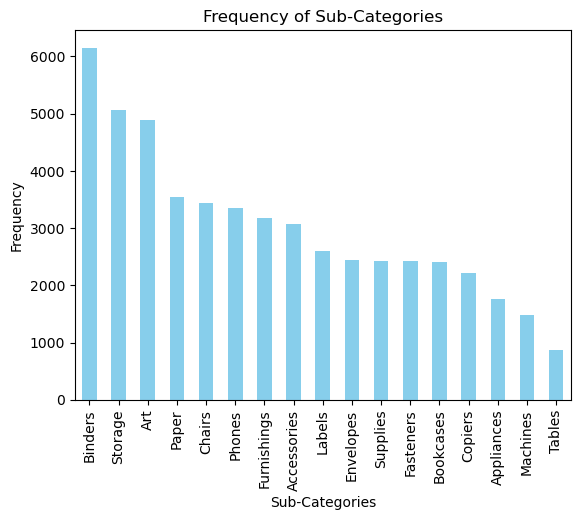

In [16]:
# Frequency of Sub-Category

frequency_counts = new_df['Sub-Category'].value_counts()

# Create a bar plot

frequency_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Sub-Categories')
plt.ylabel('Frequency')
plt.title('Frequency of Sub-Categories')
plt.show()

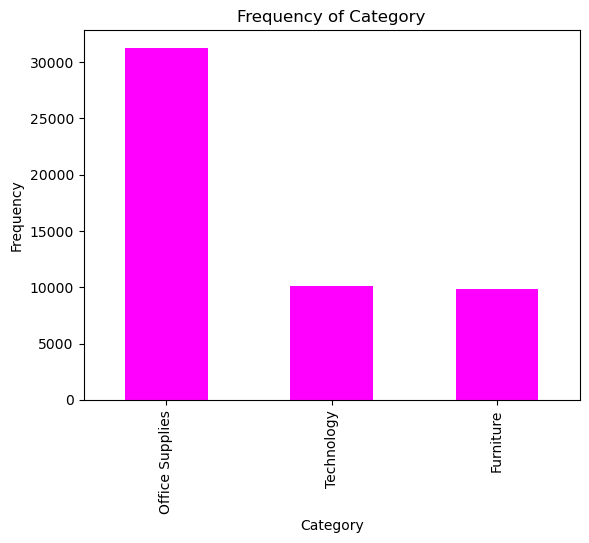

In [17]:
# Frequency of Category

frequency_counts = new_df['Category'].value_counts()

# Create a bar plot

frequency_counts.plot(kind='bar', color='magenta')

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Category')
plt.show()

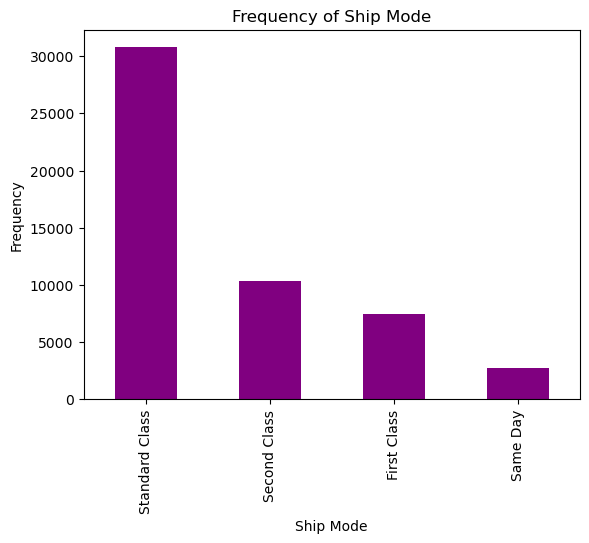

In [18]:
#Frequency of Ship Mode

frequency_counts = new_df['Ship Mode'].value_counts()

# Create a bar plot
frequency_counts.plot(kind='bar', color='purple')

plt.xlabel('Ship Mode')
plt.ylabel('Frequency')
plt.title('Frequency of Ship Mode')
plt.show()

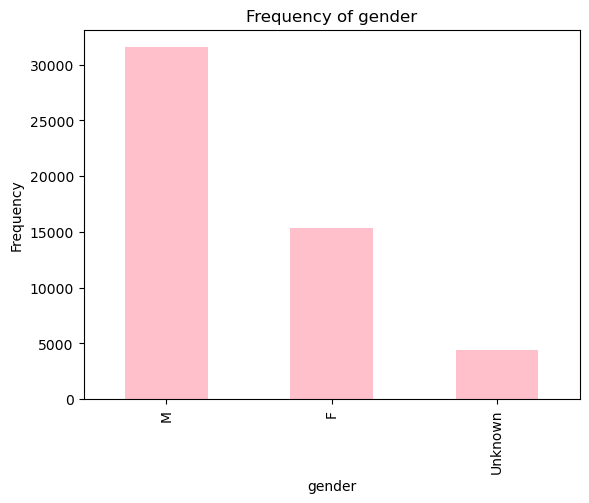

In [14]:
#Frequency of gender

frequency_counts = new_df['gender'].value_counts()

# Create a bar plot
frequency_counts.plot(kind='bar', color='pink')

plt.xlabel('gender')
plt.ylabel('Frequency')
plt.title('Frequency of gender')
plt.show()

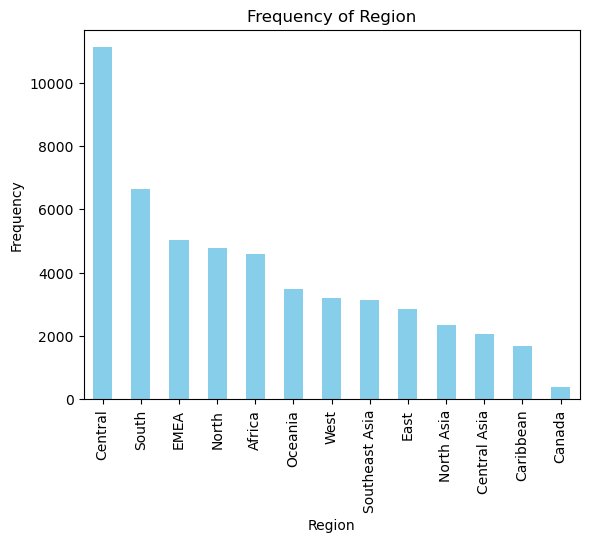

In [16]:
#Frequency of Region

frequency_counts = new_df['Region'].value_counts()

# Create a bar plot
frequency_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Frequency of Region')
plt.show()

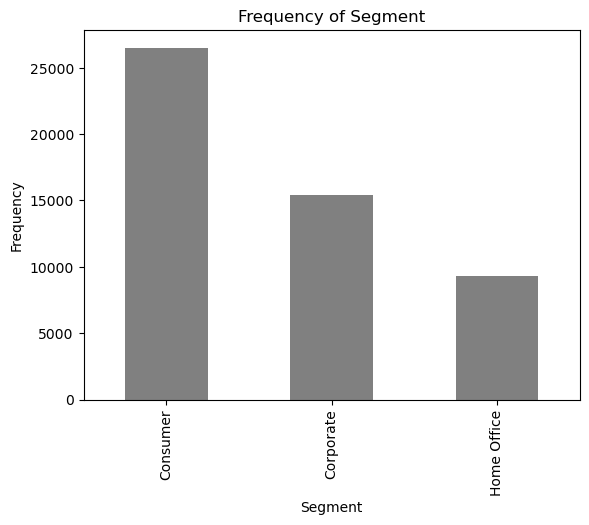

In [17]:
#Frequency of Segment

frequency_counts = new_df['Segment'].value_counts()

# Create a bar plot
frequency_counts.plot(kind='bar', color='grey')

plt.xlabel('Segment')
plt.ylabel('Frequency')
plt.title('Frequency of Segment')
plt.show()

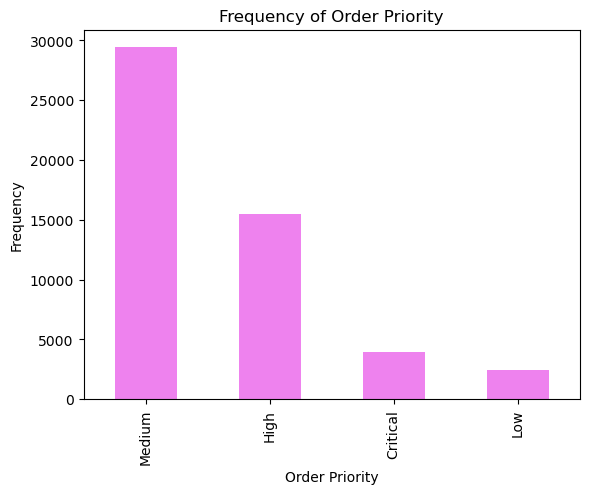

In [18]:
#Frequency of Order Priority

frequency_counts = new_df['Order Priority'].value_counts()

# Create a bar plot
frequency_counts.plot(kind='bar', color='violet')

plt.xlabel('Order Priority')
plt.ylabel('Frequency')
plt.title('Frequency of Order Priority')
plt.show()

# OUTLIERS

In [5]:

#Add a function to find outliers

def find_outliers_IQR(new_df_column):

   q1=new_df_column.quantile(0.25)

   q3=new_df_column.quantile(0.75)

   IQR=q3-q1

   outliers = new_df_column[((new_df_column<(q1-1.5*IQR)) | (new_df_column>(q3+1.5*IQR)))]

   return outliers

In [6]:
# Create 'outliers' variable which is a dictionary and contains 
# the results of the 'find_outliers_IQR' function for each column (quantitative variables).

outliers = {
     "Sales": find_outliers_IQR(new_df['Sales']),
     "Profit": find_outliers_IQR(new_df['Profit']),
     "Quantity" : find_outliers_IQR(new_df['Quantity']),
     "Discount" : find_outliers_IQR(new_df['Discount']),
     "Shipping Cost" : find_outliers_IQR(new_df['Shipping Cost']),
 }

In [7]:
# Add a function to print the number, minimum, and maximum values of outliers for each column.

def inspect_outliers(outliers):
    for column, values in outliers.items():
        print(f'Column: {column}')
        print('Number of outliers:', len(values))
        print('Max outlier value:', max(values))
        print('Min outlier value:', min(values))
        print()  # Empty line for separation

In [8]:
inspect_outliers(outliers)

Column: Sales
Number of outliers: 5655
Max outlier value: 22638.48
Min outlier value: 581.55

Column: Profit
Number of outliers: 9755
Max outlier value: 8399.976
Min outlier value: -6599.978

Column: Quantity
Number of outliers: 877
Max outlier value: 14
Min outlier value: 10

Column: Discount
Number of outliers: 4172
Max outlier value: 0.85
Min outlier value: 0.55

Column: Shipping Cost
Number of outliers: 5909
Max outlier value: 933.57
Min outlier value: 57.21



In [9]:
# Add a function to replace outliers using imputation (upper and lower values)

def impute_outliers_IQR(new_df):

   q1=new_df.quantile(0.25)

   q3=new_df.quantile(0.75)

   IQR=q3-q1

   upper = new_df[~(new_df>(q3+1.5*IQR))].max()

   lower = new_df[~(new_df<(q1-1.5*IQR))].min()

   new_df = np.where(new_df > upper,
                     upper,
                     np.where(new_df < lower,
                              lower,
                              new_df
                              )
                    )


   return new_df

In [10]:
new_df['Sales'] = impute_outliers_IQR(new_df['Sales'])
new_df.describe()['Sales']

count    51290.000000
mean       172.348697
std        190.074114
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max        581.400000
Name: Sales, dtype: float64

In [11]:
new_df['Profit'] = impute_outliers_IQR(new_df['Profit'])
new_df.describe()['Profit']

count    51290.000000
mean        18.095033
std         39.833620
min        -55.125000
25%          0.000000
50%          9.240000
75%         36.810000
max         91.995400
Name: Profit, dtype: float64

In [12]:
new_df['Quantity'] = impute_outliers_IQR(new_df['Quantity'])
new_df.describe()['Quantity']

count    51290.000000
mean         3.430181
std          2.124489
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: Quantity, dtype: float64

In [13]:
new_df['Discount'] = impute_outliers_IQR(new_df['Discount'])
new_df.describe()['Discount']

count    51290.000000
mean         0.130049
std          0.182638
min          0.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          0.500000
Name: Discount, dtype: float64

In [14]:
new_df['Shipping Cost'] = impute_outliers_IQR(new_df['Shipping Cost'])
new_df.describe()['Shipping Cost']

count    51290.000000
mean        16.710695
std         18.973809
min          0.000000
25%          2.610000
50%          7.790000
75%         24.450000
max         57.200000
Name: Shipping Cost, dtype: float64

In [23]:
# Display descriptive statistics without outliers 

new_df.describe() 

Row ID         Sales      Quantity      Discount        Profit  \
count  51290.00000  51290.000000  51290.000000  51290.000000  51290.000000   
mean   25645.50000    172.348697      3.430181      0.130049     18.095033   
std    14806.29199    190.074114      2.124489      0.182638     39.833620   
min        1.00000      0.444000      1.000000      0.000000    -55.125000   
25%    12823.25000     30.758625      2.000000      0.000000      0.000000   
50%    25645.50000     85.053000      3.000000      0.000000      9.240000   
75%    38467.75000    251.053200      5.000000      0.200000     36.810000   
max    51290.00000    581.400000      9.000000      0.500000     91.995400   

       Shipping Cost  
count   51290.000000  
mean       16.710695  
std        18.973809  
min         0.000000  
25%         2.610000  
50%         7.790000  
75%        24.450000  
max        57.200000

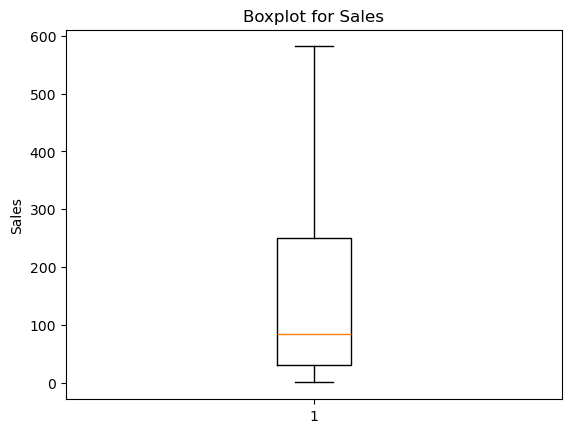

In [28]:
# Boxplot for Sales without outliers

plt.boxplot(new_df['Sales'])
plt.ylabel('Sales')
plt.title('Boxplot for Sales')
plt.show()

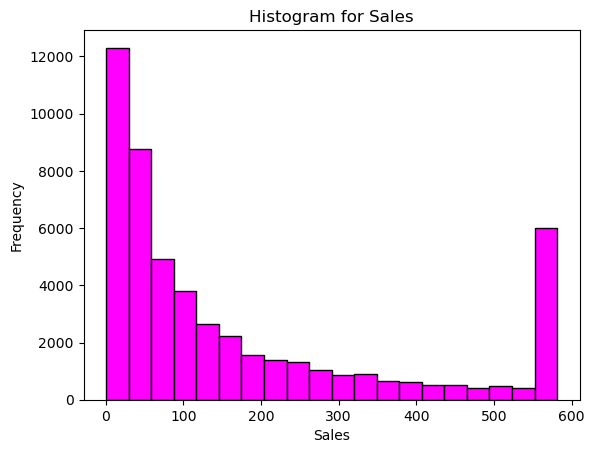

In [27]:
#Histogram for Sales without outliers

plt.hist(new_df['Sales'], bins=20, color='magenta', edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram for Sales')

plt.show()

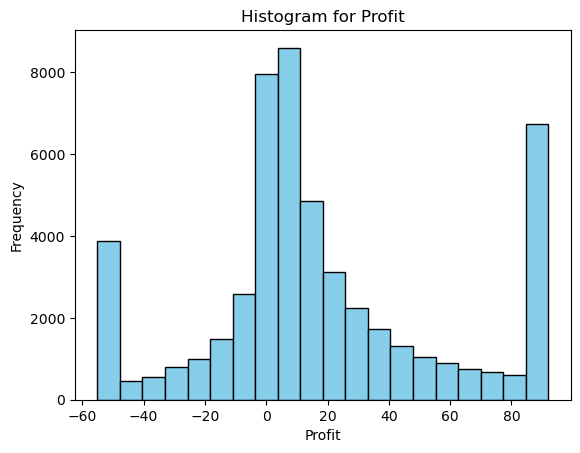

In [28]:
# Histogram for Profit without outliers

plt.hist(new_df['Profit'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Histogram for Profit')

plt.show()

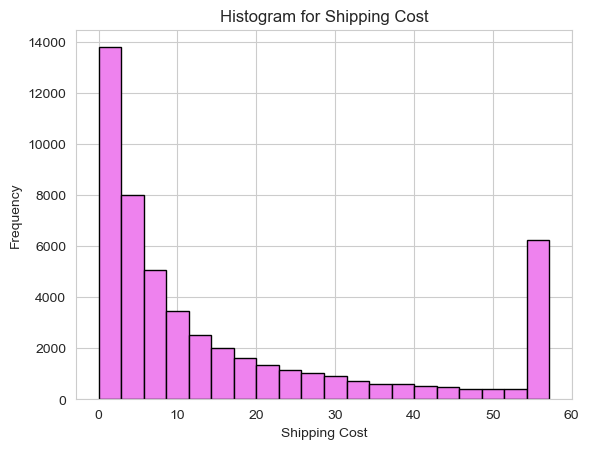

In [98]:
# Histogram for Shipping Cost without outliers

plt.hist(new_df['Shipping Cost'], bins=20, color='violet', edgecolor='black')
plt.xlabel('Shipping Cost')
plt.ylabel('Frequency')
plt.title('Histogram for Shipping Cost')

plt.show()

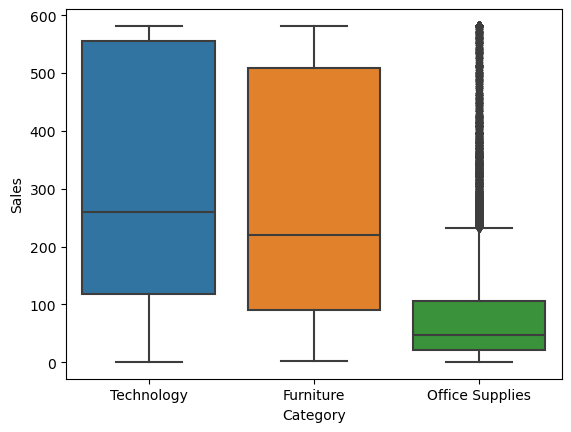

In [29]:
#  Boxplot for Category - Sales

sns.boxplot(x='Category', y='Sales', data=new_df)
plt.show()

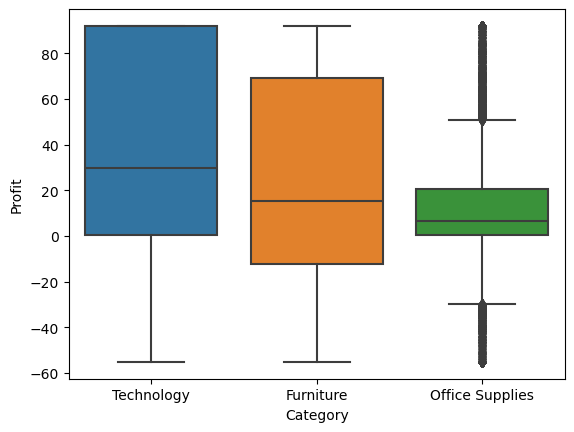

In [30]:
# Boxplot fot Category - Profit 

sns.boxplot(x='Category', y='Profit', data=new_df)
plt.show()

In [31]:
# Create a subset with numeric variables

numeric_df= new_df.select_dtypes(include=['number'])
numeric_df

Row ID    Sales  Quantity  Discount   Profit  Shipping Cost
0       32298  581.400         7       0.0  91.9954          57.20
1       26341  581.400         9       0.1 -55.1250          57.20
2       25330  581.400         9       0.1  91.9954          57.20
3       13524  581.400         5       0.1 -55.1250          57.20
4       47221  581.400         8       0.0  91.9954          57.20
...       ...      ...       ...       ...      ...            ...
51285   29002   65.100         5       0.0   4.5000           0.01
51286   35398    0.444         1       0.5  -1.1100           0.01
51287   40470   22.920         3       0.0  11.2308           0.01
51288    9596   13.440         2       0.0   2.4000           0.00
51289    6147   61.380         3       0.0   1.8000           0.00

[51290 rows x 6 columns]

In [32]:
#Correlation matrix for numeric variables
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                 Row ID     Sales  Quantity  Discount    Profit  Shipping Cost
Row ID         1.000000 -0.093583 -0.186754  0.039008 -0.045886      -0.086622
Sales         -0.093583  1.000000  0.358213 -0.110909  0.483440       0.890315
Quantity      -0.186754  0.358213  1.000000 -0.007026  0.182039       0.329599
Discount       0.039008 -0.110909 -0.007026  1.000000 -0.575820      -0.105134
Profit        -0.045886  0.483440  0.182039 -0.575820  1.000000       0.441676
Shipping Cost -0.086622  0.890315  0.329599 -0.105134  0.441676       1.000000


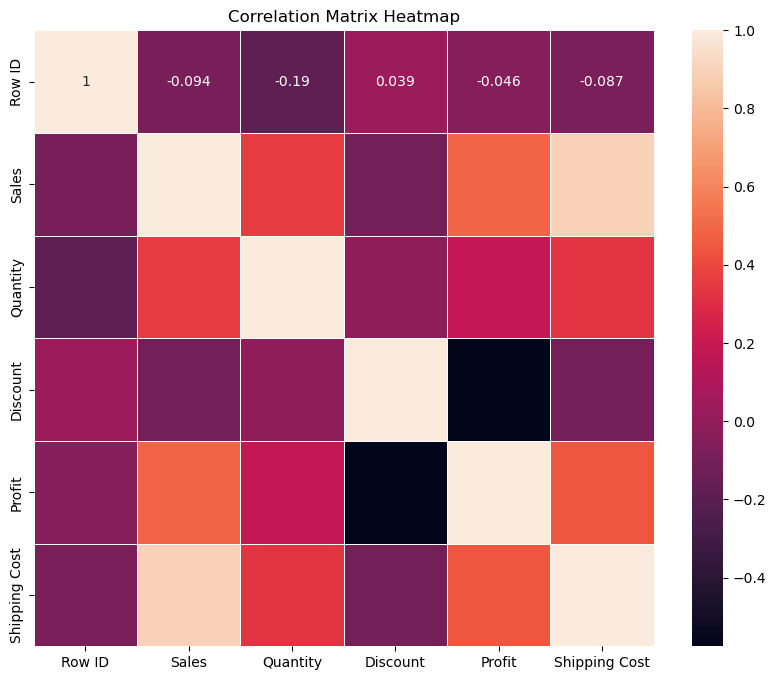

In [33]:
# Correlation with heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

c:\anacondanew\envs\Masterthesis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\anacondanew\envs\Masterthesis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\anacondanew\envs\Masterthesis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\anacondanew\envs\Masterthesis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

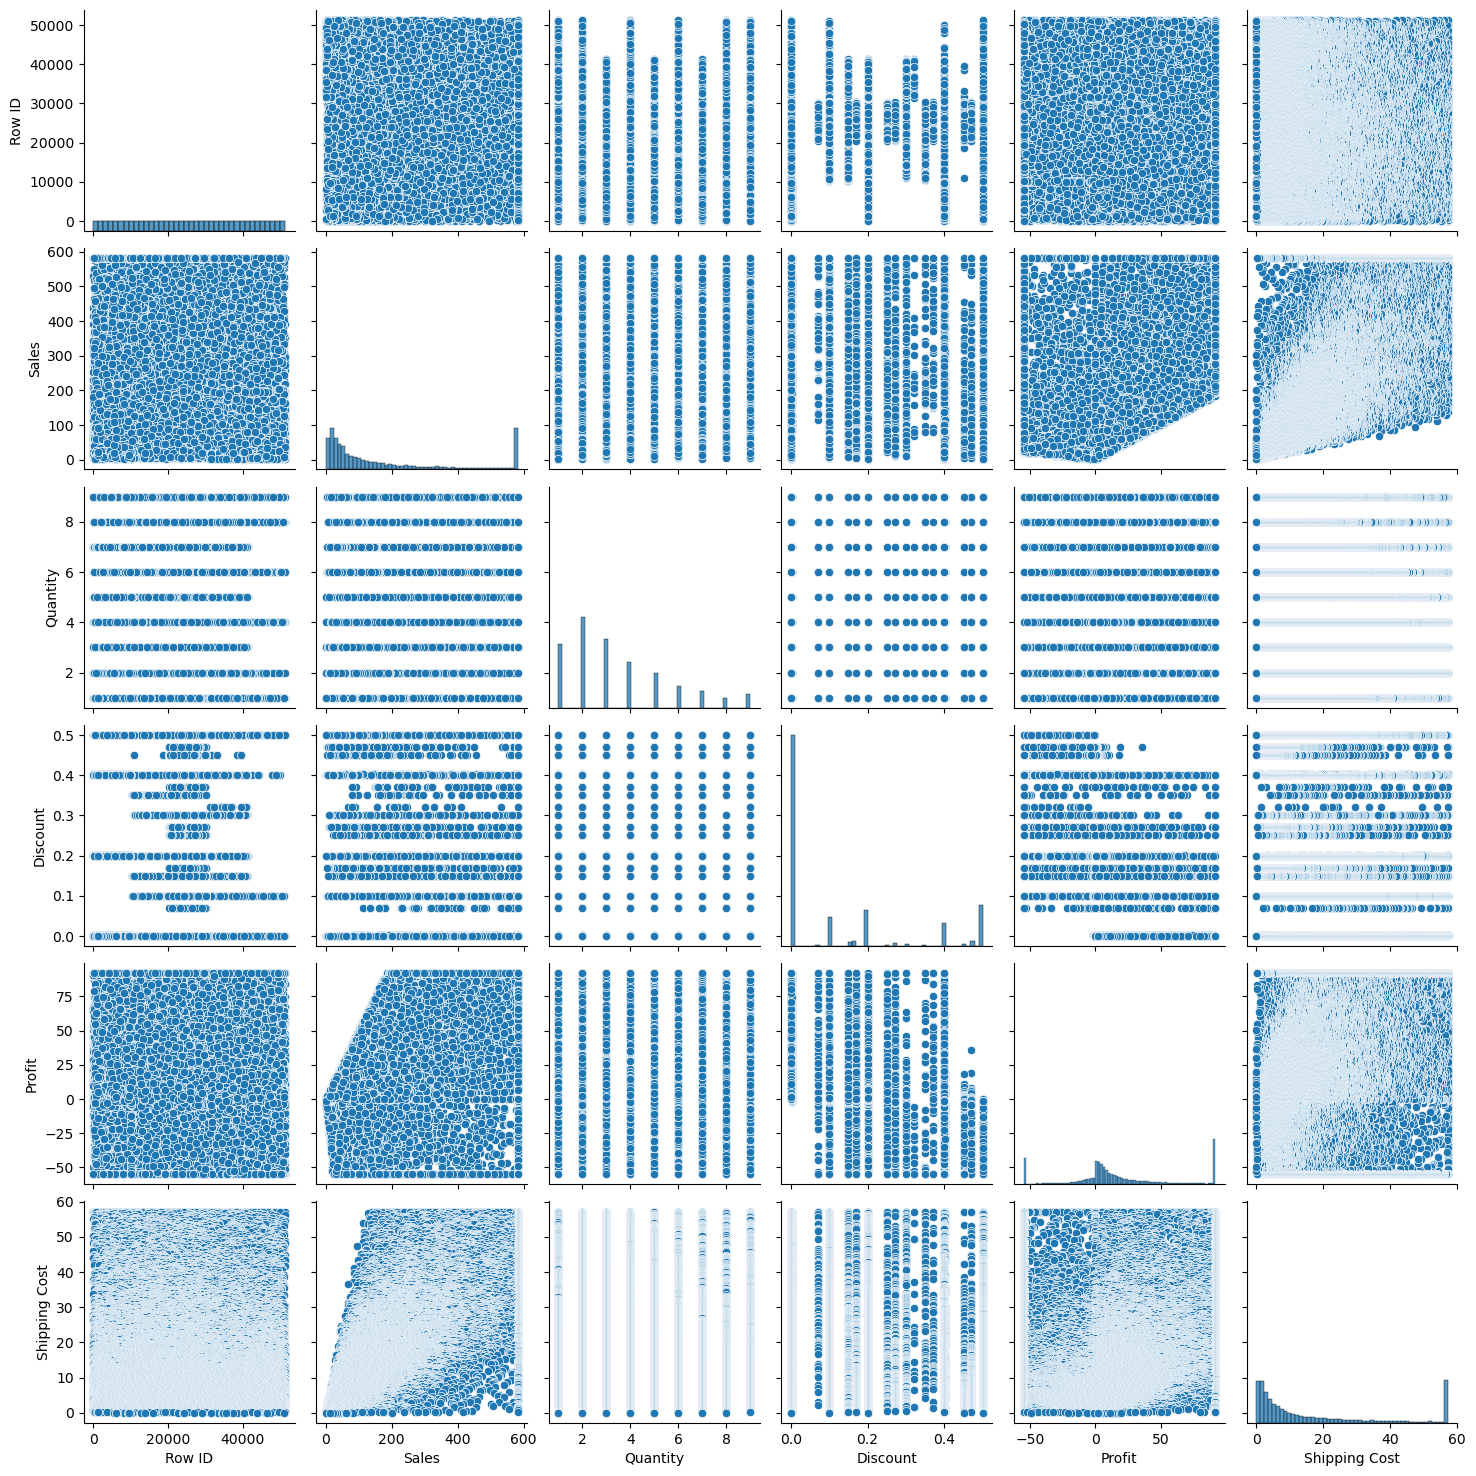

In [34]:
# Create a scatterplot matrix

sns.pairplot(numeric_df)
plt.show()

In [35]:
from scipy.stats import chi2_contingency 

# Function for Chi square test for categorical variables with a=0.05


def is_correlated (x,y):
   data =pd.crosstab (new_df[x],new_df[y])
   chi2_result = chi2_contingency(data,)
   p, x= chi2_result[1], "Correlated" if chi2_result[1] < 0.05 else "Not-Correlated"
   return p,x

In [36]:
is_correlated ('Category', 'Country')

(2.4763382236218627e-56, 'Correlated')

In [37]:
is_correlated ('Category', 'Market')

(5.26267162641808e-112, 'Correlated')

In [38]:
is_correlated ('Category', 'State')

(1.0863117121292738e-15, 'Correlated')

In [39]:
is_correlated ('Category', 'Sub-Category')

(0.0, 'Correlated')

In [40]:
is_correlated ('Category', 'City')

(1.4673081438085744e-07, 'Correlated')

In [41]:
is_correlated ('Sub-Category', 'Ship Mode')

(0.050352441794451384, 'Not-Correlated')

In [42]:
is_correlated ('Category', 'Ship Mode')

(0.8573739834400929, 'Not-Correlated')

In [43]:
is_correlated ('Category', 'Order Priority')

(0.34193459764520795, 'Not-Correlated')

In [44]:
is_correlated ('Category', 'Segment')

(0.6051011989659332, 'Not-Correlated')

In [45]:
is_correlated ('Category', 'gender')

(0.33595859770359143, 'Not-Correlated')

In [46]:
is_correlated ('gender', 'Country')

(2.7777732455720444e-62, 'Correlated')

In [47]:
is_correlated ('Category', 'Region')

(4.2788151792510144e-58, 'Correlated')

# Product and Consumer Analysis

In [15]:
# Create the variables Order_year, Order_month, Order_day from Order Date

new_df['Order Date'] = pd.to_datetime(new_df['Order Date'])


new_df['Order_year'] = new_df['Order Date'].dt.year
new_df['Order_month'] = new_df['Order Date'].dt.month
new_df['Order_day'] = new_df['Order Date'].dt.day

C:\Users\ελισαβετ\AppData\Local\Temp\ipykernel_2872\3062080850.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  new_df['Order Date'] = pd.to_datetime(new_df['Order Date'])


In [16]:
new_df.head()

Row ID         Order ID Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  \
0       Rick Hansen     Consumer  New York City         New York   
1     Justin Ritter    Corporate     Wollongong  New South Wales   
2      Craig Reiter     Consumer       Brisbane       Queensland   
3  Katherine Murray  Home Office         Berlin           Berlin   
4       Rick Hansen     Consumer          Dakar            Dakar   

         Country  Market   Region        Product ID    Category Sub-Category  \
0  United States      US     East   TEC-AC-10003033  Technology  Accessories   
1      Australia    APAC  Oceania   FUR-CH-10003950   Furniture       Chairs   
2      Australia    APAC  Oceania   TEC-PH-10004664  Technology       Phones   
3        Germany      EU  Central   TEC-PH-10004583  Technology       Phones   
4        Senegal  Africa   Africa  TEC-SHA-10000501  Technology      Copiers   

                                        Product Name  Sales  Quantity  \
0  Plantronics CS510 - Over-the-Head monaural Wir...  581.4         7   
1          Novimex Executive Leather Armchair, Black  581.4         9   
2                  Nokia Smart Phone, with Caller ID  581.4         9   
3                     Motorola Smart Phone, Cordless  581.4         5   
4                     Sharp Wireless Fax, High-Speed  581.4         8   

   Discount   Profit  Shipping Cost Order Priority gender  Order_year  \
0       0.0  91.9954           57.2       Critical      M        2012   
1       0.1 -55.1250           57.2       Critical      M        2013   
2       0.1  91.9954           57.2         Medium      M        2013   
3       0.1 -55.1250           57.2         Medium      F        2013   
4       0.0  91.9954           57.2       Critical      M        2013   

   Order_month  Order_day  
0            7         31  
1            2          5  
2           10         17  
3            1         28  
4           11          5

In [50]:
# Sales by year, month and day

# Group by year, month, and day


sales_by_year = new_df.groupby('Order_year')['Sales'].sum()
sales_by_yearmonth = new_df.groupby(['Order_year','Order_month'])['Sales'].sum()
sales_by_day = new_df.groupby('Order_day')['Sales'].sum()

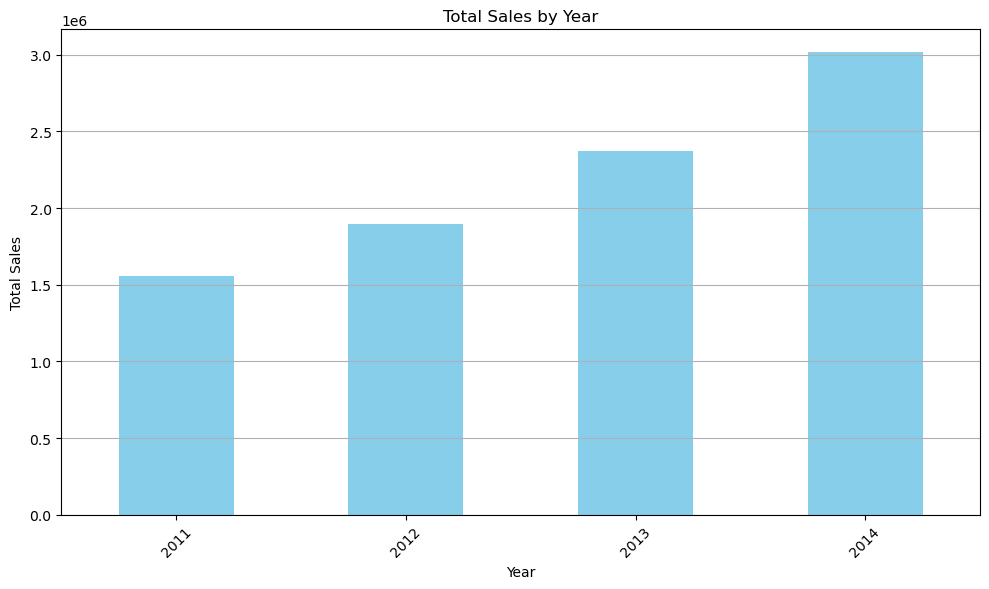

In [51]:
# Bar plot for sales by year 

plt.figure(figsize=(10, 6))
sales_by_year.plot(kind='bar',  color='skyblue')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [52]:
sales_by_yearmonth.head()

Order_year  Order_month
2011        1               71211.70362
            2               65290.61358
            3               90127.26690
            4               89165.76380
            5              103946.31142
Name: Sales, dtype: float64

In [53]:
# Reset index to make 'Order_year' and 'Order_month' regular columns

sales_by_yearmonth = sales_by_yearmonth.reset_index()

In [54]:
sales_by_yearmonth.head()

Order_year  Order_month         Sales
0        2011            1   71211.70362
1        2011            2   65290.61358
2        2011            3   90127.26690
3        2011            4   89165.76380
4        2011            5  103946.31142

In [55]:
# Define a dictionary mapping month numbers to their names

month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

In [56]:
# Map the month numbers to their names using the dictionary

sales_by_yearmonth['Order_month'] = sales_by_yearmonth['Order_month'].map(month_names)

In [57]:
sales_by_yearmonth.head()

Order_year Order_month         Sales
0        2011     January   71211.70362
1        2011    February   65290.61358
2        2011       March   90127.26690
3        2011       April   89165.76380
4        2011         May  103946.31142

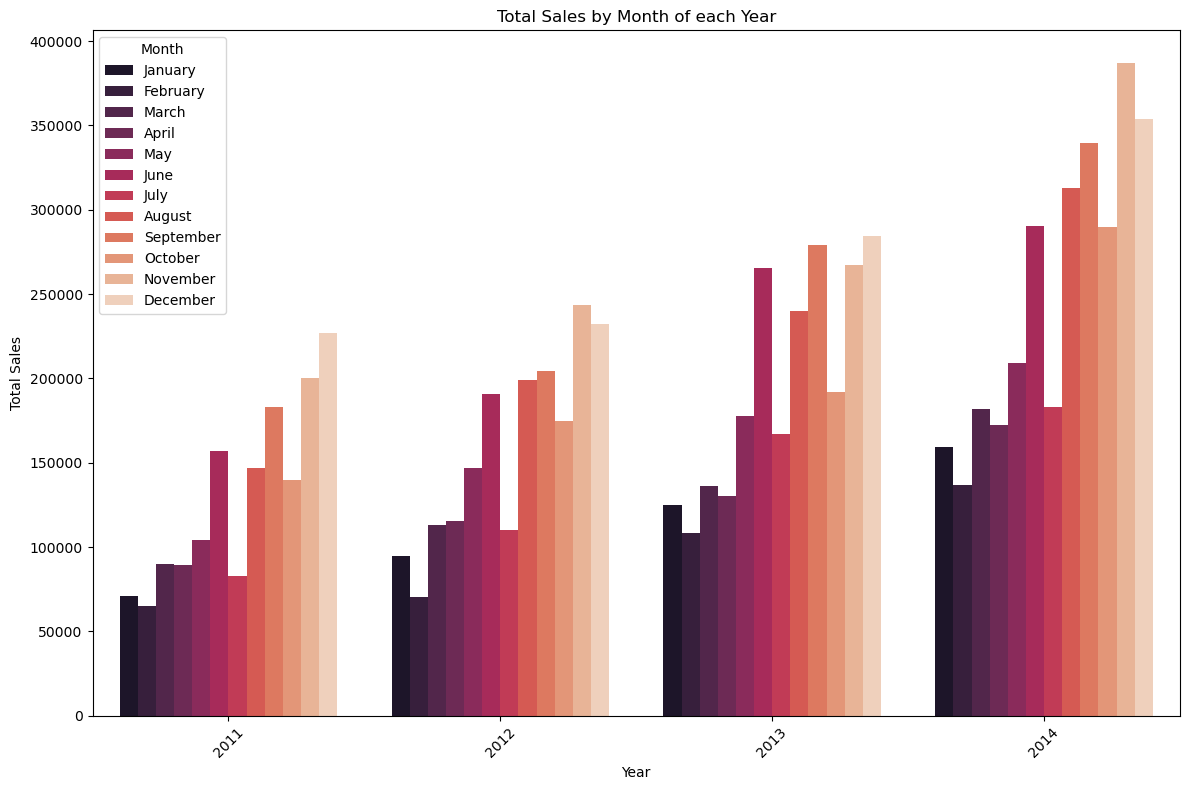

In [58]:
# Create the grouped bar plot

plt.figure(figsize=(12, 8))
sns.barplot(data=sales_by_yearmonth, x='Order_year', y='Sales', hue='Order_month', palette='rocket')
plt.title('Total Sales by Month of each Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Month', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
# Now, group only by month 

sales_by_month = new_df.groupby('Order_month')['Sales'].sum()
sales_by_month = sales_by_month.reset_index()
sales_by_month['Order_month'] = sales_by_month['Order_month'].map(month_names)

In [60]:
sales_by_month.head()

Order_month         Sales
0     January  450428.98366
1    February  380947.45488
2       March  521502.50384
3       April  506693.18262
4         May  637519.62834

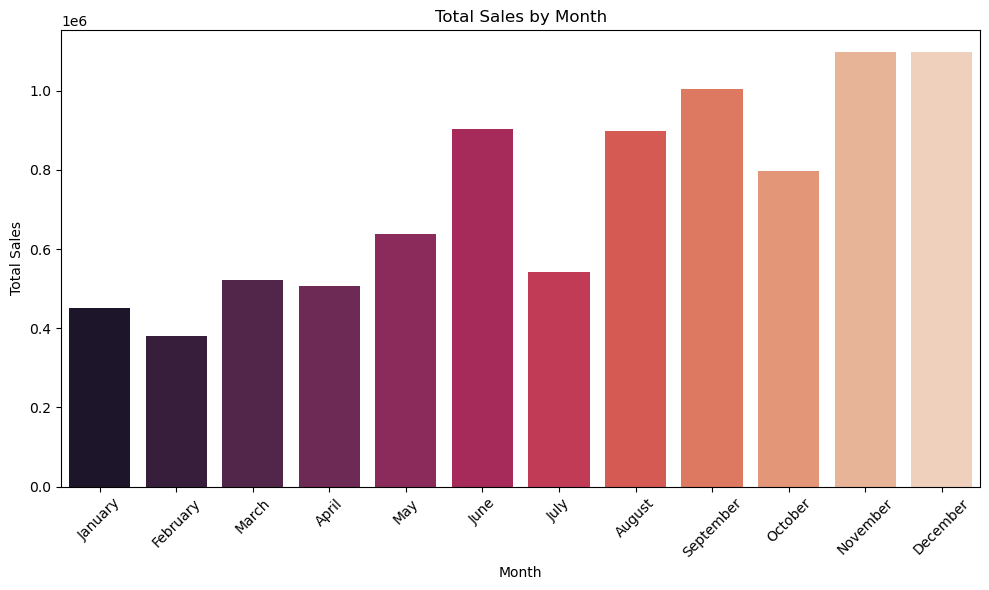

In [61]:
# Bar plot by Month

plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_month, x='Order_month', y='Sales', palette='rocket')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

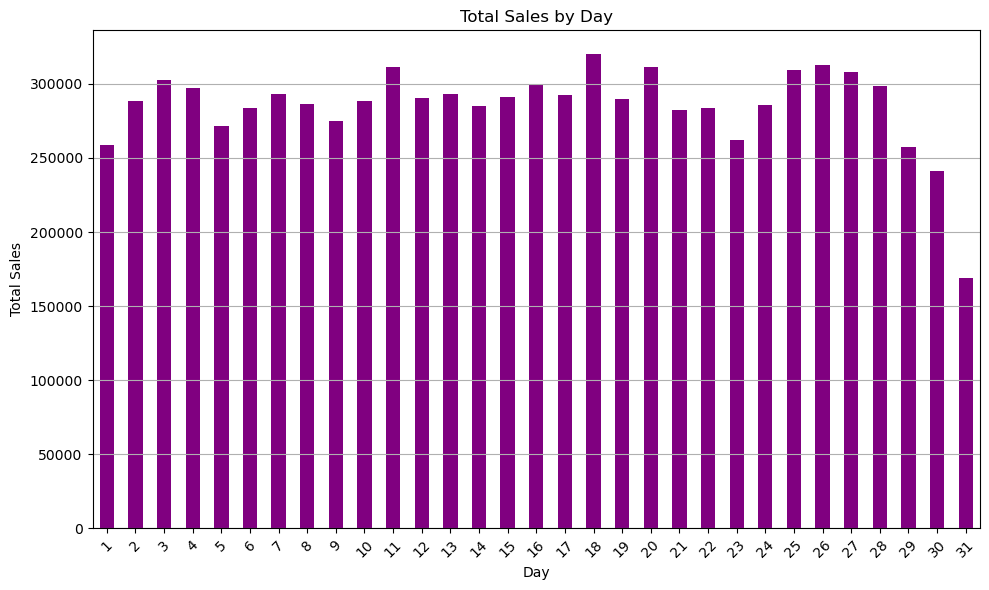

In [62]:
# Bar plot for sales by day

plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar',  color='purple')
plt.title('Total Sales by Day')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [65]:

sales_by_month = new_df.groupby('Order_month')['Sales'].sum()
sales_by_month

Order_month
1     4.504290e+05
2     3.809475e+05
3     5.215025e+05
4     5.066932e+05
5     6.375196e+05
6     9.031039e+05
7     5.433536e+05
8     8.984556e+05
9     1.005827e+06
10    7.962189e+05
11    1.098056e+06
12    1.097658e+06
Name: Sales, dtype: float64

In [72]:
# Now , i will create an interactive plot with 3 subplots 'Sales by Year', 'Sales by Month', 'Sales by Day'

import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=1, shared_xaxes=True,
                    subplot_titles=('Sales by Year', 'Sales by Month', 'Sales by Day'))

In [73]:
# Add traces 

fig.add_trace(go.Bar(x=sales_by_year.index, y=sales_by_year.values, name='Sales by Year'), row=1, col=1)
fig.add_trace(go.Bar(x=sales_by_month.index, y=sales_by_month.values, name='Sales by Month'), row=2, col=1)
fig.add_trace(go.Bar(x=sales_by_day.index, y=sales_by_day.values, name='Sales by Day'), row=3, col=1)

In [75]:
# Add slicers for interactive selection of year , month or day

fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Year",
                     method="update",
                     args=[{"visible": [True, False, False]},
                           {"title": "Sales by Year"}]),
                dict(label="Month",
                     method="update",
                     args=[{"visible": [False, True, False]},
                           {"title": "Sales by Month"}]),
                dict(label="Day",
                     method="update",
                     args=[{"visible": [False, False, True]},
                           {"title": "Sales by Day"}]),
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

fig.show()

# Which country has top sales?

In [106]:
country_group = new_df.groupby('Country')

In [107]:
country_sales = country_group.agg({'Sales':'sum'})
country_sales.sort_values(by='Sales', ascending=False)

Sales
Country                        
United States      1.490576e+06
France             6.082974e+05
Australia          5.999565e+05
Mexico             4.640911e+05
China              4.430115e+05
...                         ...
Tajikistan         2.427840e+02
Macedonia          2.096400e+02
Eritrea            1.877400e+02
Armenia            1.567500e+02
Equatorial Guinea  1.505100e+02

[147 rows x 1 columns]

In [108]:
# plot of top 5 sales countries

import squarify

In [109]:
top_5_sales = country_sales.nlargest(5, 'Sales')
top_5_sales.index

Index(['United States', 'France', 'Australia', 'Mexico', 'China'], dtype='object', name='Country')

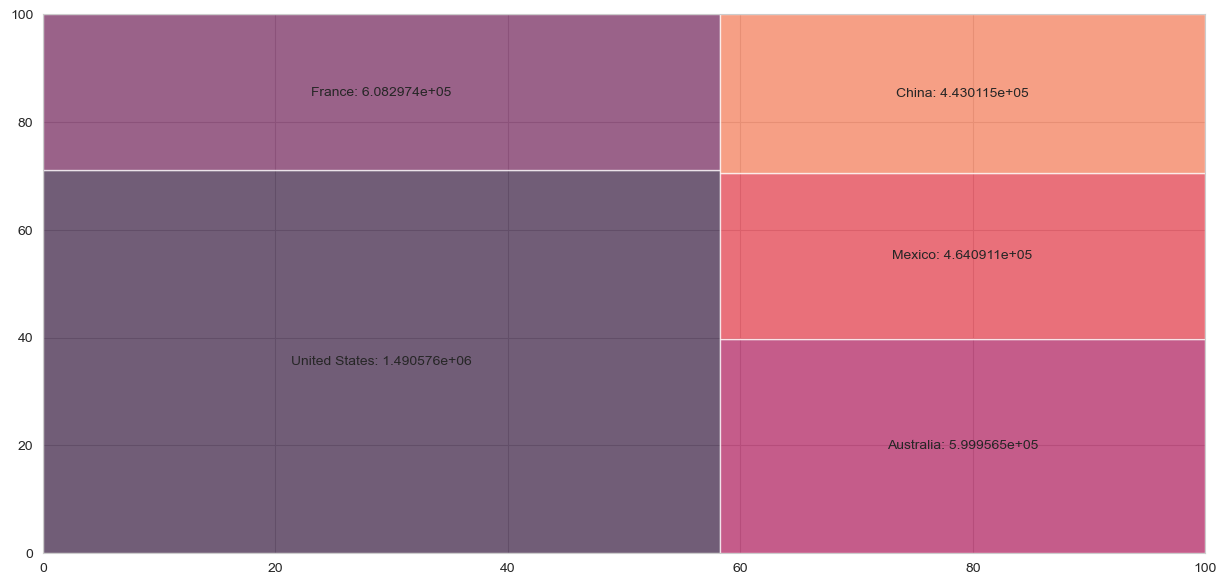

In [112]:
# Treemap plot

plt.figure(figsize=(15,7))
labels = ['United States: 1.490576e+06',
         'France: 6.082974e+05',
         'Australia: 5.999565e+05',
         'Mexico: 4.640911e+05',
         'China: 4.430115e+05']
squarify.plot(top_5_sales['Sales'].values, label=labels,color= sns.color_palette('rocket'), alpha=0.7)
plt.show()

In [81]:
#Let's make the same with percentages  


total_sales = top_5_sales['Sales'].sum()

In [82]:
# Calculate the percentages

percentages = [(sales / total_sales) * 100 for sales in top_5_sales['Sales']]

In [83]:
# Create the labels with percentages
labels = [f"{country}: {sales:.2f}%" for country, sales in zip(top_5_sales.index, percentages)]

(-1.0999910188526245,
 1.0999995718563877,
 -1.0999999966930114,
 1.0999999998425243)

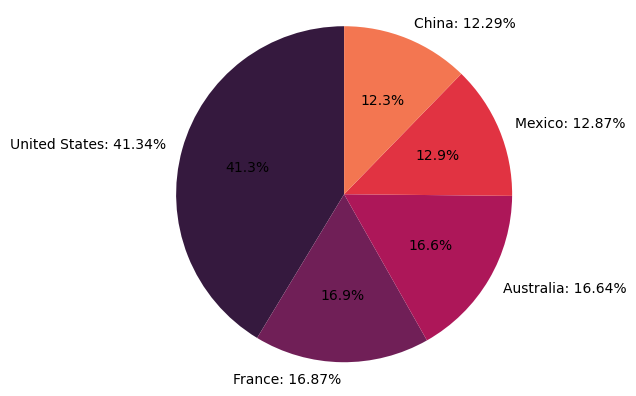

In [84]:
# Pie chart

fig, ax = plt.subplots()
ax.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('rocket'))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

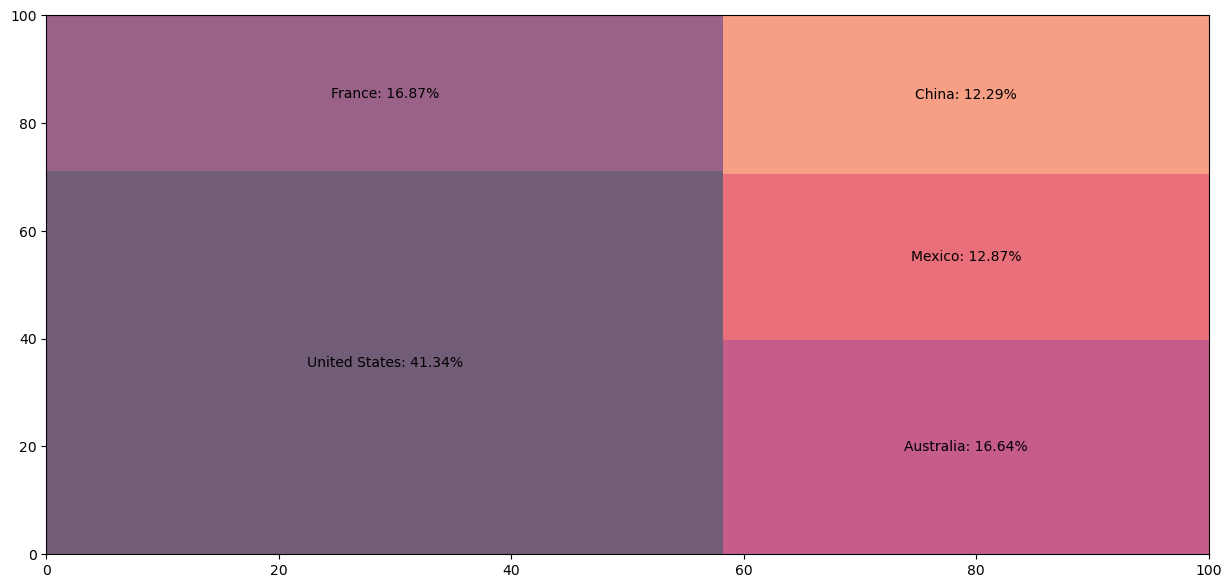

In [85]:
# Create the treemap plot

plt.figure(figsize=(15,7))
squarify.plot(top_5_sales['Sales'].values, label=labels, color=sns.color_palette('rocket'), alpha=0.7)
plt.show()

# Which are the top 6 profit-making product types on a yearly basis

In [17]:
year_category_group = new_df.groupby(['Order_year','Sub-Category'])

In [18]:
year_category_profit_df = year_category_group.agg({'Profit':'sum'})
year_category_profit_df

Profit
Order_year Sub-Category            
2011       Accessories   11448.6152
           Appliances    10453.7356
           Art           10457.7811
           Binders        8691.9773
           Bookcases     14722.6279
...                             ...
2014       Paper         19470.6720
           Phones        34625.5236
           Storage       30490.8948
           Supplies       8971.7512
           Tables         -570.3844

[68 rows x 1 columns]

In [19]:
year_category_profit_df.reset_index(inplace=True)
category_yearly_profit = year_category_profit_df.groupby('Order_year')
top6_profit_category = pd.DataFrame(columns=year_category_profit_df.columns)

In [20]:
for g, d in category_yearly_profit:
    high_profit_categories = d.nlargest(6, 'Profit')
    top6_profit_category = pd.concat([top6_profit_category,high_profit_categories])

C:\Users\ελισαβετ\AppData\Local\Temp\ipykernel_2872\3326915465.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top3_profit_category = pd.concat([top3_profit_category,high_profit_categories])


In [21]:
top6_profit_category.style.background_gradient(cmap='rocket', subset=pd.IndexSlice[:, 'Profit'])

In [22]:
# Set the seaborn style
sns.set_style('whitegrid')

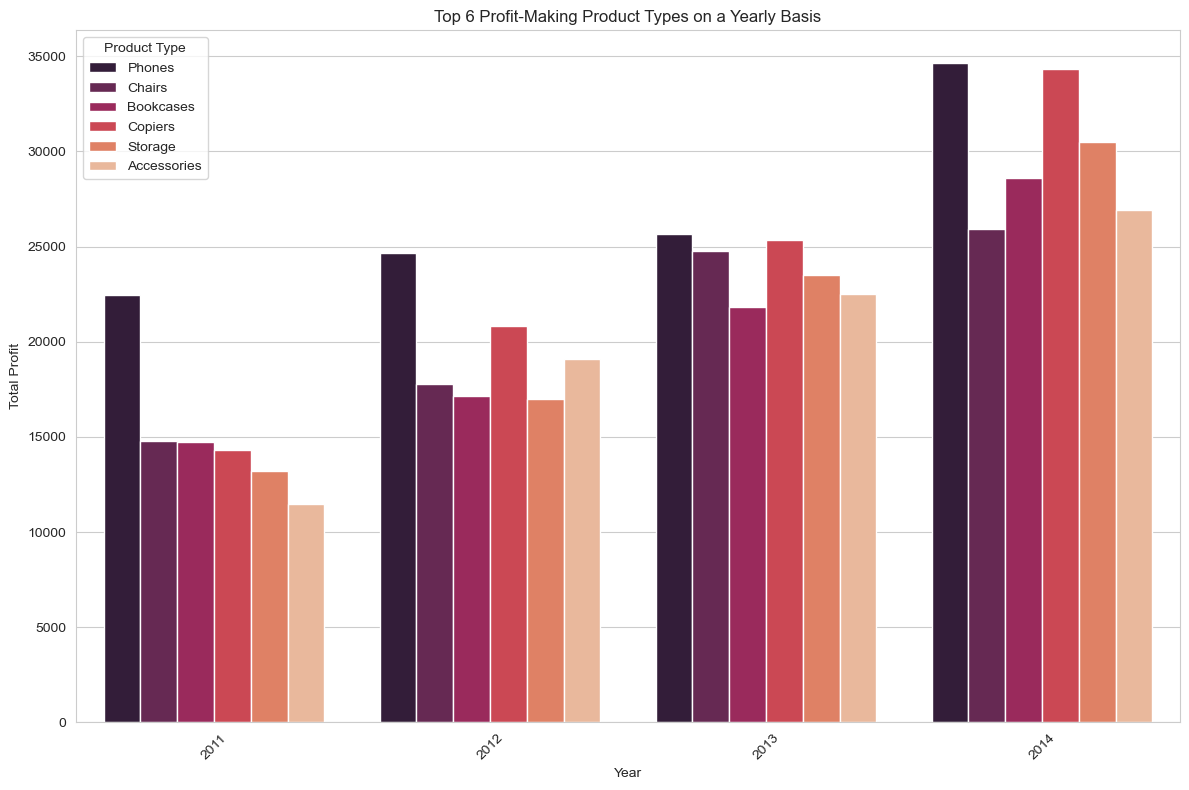

In [24]:
# Plotting the Top 3 Profit-Making Product Types on a Yearly Basis

plt.figure(figsize=(12, 8))
sns.barplot(data=top6_profit_category, x='Order_year', y='Profit', hue='Sub-Category', palette='rocket')
plt.title('Top 6 Profit-Making Product Types on a Yearly Basis')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.legend(title='Product Type', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# How the customers are distributed across the countries?

In [30]:
import plotly.graph_objects as go
from plotly.offline import iplot

In [25]:
# Group by country

country_group = new_df.groupby(['Country'])

In [26]:
customer_distribution = country_group.agg({'Customer ID':'count'})
customer_distribution.columns = ['Customer_count']
customer_distribution.reset_index(inplace=True)
customer_distribution

Country  Customer_count
0    Afghanistan              55
1        Albania              16
2        Algeria             196
3         Angola             122
4      Argentina             390
..           ...             ...
142    Venezuela             194
143      Vietnam             265
144        Yemen              30
145       Zambia             102
146     Zimbabwe              80

[147 rows x 2 columns]

In [35]:
country_map = dict(type='choropleth',
           locations=customer_distribution['Country'],
           locationmode='country names',
           z=customer_distribution['Customer_count'],
            reversescale = True,
           text=customer_distribution['Country'],
           colorscale='rainbow',
           colorbar={'title':'Customer Count'})

In [36]:
layout = dict(title='Customer Distribution over Countries',
             geo=dict(showframe=False,projection={'type':'mercator'}))

In [38]:
# Plot choropleth map
 
choroplot = go.Figure(data = [country_map],layout = layout)
iplot(choroplot)

# Encoding of categorical variables

In [39]:
# Ordinal encoding for (order priority) variable

from sklearn.preprocessing import OrdinalEncoder

order_of_categories = [['Low', 'Medium', 'High','Critical']]

# Create an instance of OrdinalEncoder with specified categories
ordinal_encoder = OrdinalEncoder(categories=order_of_categories)

# Fit and transform the 'Order Priority' column

new_df['Order_Priority_Encoded'] = ordinal_encoder.fit_transform(new_df[['Order Priority']]) + 1

print(new_df['Order_Priority_Encoded'])

0        4.0
1        4.0
2        2.0
3        2.0
4        4.0
        ... 
51285    2.0
51286    2.0
51287    3.0
51288    2.0
51289    3.0
Name: Order_Priority_Encoded, Length: 51290, dtype: float64


In [42]:
# Define which variables to drop and to encode 

to_drop = [ 'Row ID','Order ID','Ship Date','Product ID','Product Name',
            'Order Priority','Customer Name','Customer ID','Order Date',
            'Sales','State','Discount','Profit','Quantity','Order_year',
            'City','Ship Mode','Country','Market','Order_month','Order_day']
to_encode = [ 'Ship Mode','Segment','Market', 'Category','Sub-Category','Region','gender','Country']
to_encode = [i for i in to_encode if i not in to_drop]

In [43]:
# Variables that remained

temp_df = new_df.drop(columns=to_drop)
temp_df.columns

Index(['Segment', 'Region', 'Category', 'Sub-Category', 'Shipping Cost',
       'gender', 'Order_Priority_Encoded'],
      dtype='object')

In [44]:
# One-hot encoding for ('Segment', 'Region', 'Category', 'Sub-Category','gender')

encoded_data= pd.get_dummies(new_df, columns=to_encode, dtype=int)

In [45]:
encoded_data.head()

Row ID         Order ID Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05  06-11-2013      Same Day     RH-9495   

      Customer Name           City            State        Country  Market  \
0       Rick Hansen  New York City         New York  United States      US   
1     Justin Ritter     Wollongong  New South Wales      Australia    APAC   
2      Craig Reiter       Brisbane       Queensland      Australia    APAC   
3  Katherine Murray         Berlin           Berlin        Germany      EU   
4       Rick Hansen          Dakar            Dakar        Senegal  Africa   

         Product ID                                       Product Name  Sales  \
0   TEC-AC-10003033  Plantronics CS510 - Over-the-Head monaural Wir...  581.4   
1   FUR-CH-10003950          Novimex Executive Leather Armchair, Black  581.4   
2   TEC-PH-10004664                  Nokia Smart Phone, with Caller ID  581.4   
3   TEC-PH-10004583                     Motorola Smart Phone, Cordless  581.4   
4  TEC-SHA-10000501                     Sharp Wireless Fax, High-Speed  581.4   

   Quantity  Discount   Profit  Shipping Cost Order Priority  Order_year  \
0         7       0.0  91.9954           57.2       Critical        2012   
1         9       0.1 -55.1250           57.2       Critical        2013   
2         9       0.1  91.9954           57.2         Medium        2013   
3         5       0.1 -55.1250           57.2         Medium        2013   
4         8       0.0  91.9954           57.2       Critical        2013   

   Order_month  Order_day  Order_Priority_Encoded  Segment_Consumer  \
0            7         31                     4.0                 1   
1            2          5                     4.0                 0   
2           10         17                     2.0                 1   
3            1         28                     2.0                 0   
4           11          5                     4.0                 1   

   Segment_Corporate  Segment_Home Office  Category_Furniture  \
0                  0                    0                   0   
1                  1                    0                   1   
2                  0                    0                   0   
3                  0                    1                   0   
4                  0                    0                   0   

   Category_Office Supplies  Category_Technology  Sub-Category_Accessories  \
0                         0                    1                         1   
1                         0                    0                         0   
2                         0                    1                         0   
3                         0                    1                         0   
4                         0                    1                         0   

   Sub-Category_Appliances  Sub-Category_Art  Sub-Category_Binders  \
0                        0                 0                     0   
1                        0                 0                     0   
2                        0                 0                     0   
3                        0                 0                     0   
4                        0                 0                     0   

   Sub-Category_Bookcases  Sub-Category_Chairs  Sub-Category_Copiers  \
0                       0                    0                     0   
1                       0                    1                     0   
2                       0                    0                     0   
3                       0                    0                     0   
4                       0                    0 

In [46]:
encoded_data.drop(columns=to_drop, inplace=True)

In [48]:
encoded_data.columns

Index(['Shipping Cost', 'Order_Priority_Encoded', 'Segment_Consumer',
       'Segment_Corporate', 'Segment_Home Office', 'Category_Furniture',
       'Category_Office Supplies', 'Category_Technology',
       'Sub-Category_Accessories', 'Sub-Category_Appliances',
       'Sub-Category_Art', 'Sub-Category_Binders', 'Sub-Category_Bookcases',
       'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Envelopes',
       'Sub-Category_Fasteners', 'Sub-Category_Furnishings',
       'Sub-Category_Labels', 'Sub-Category_Machines', 'Sub-Category_Paper',
       'Sub-Category_Phones', 'Sub-Category_Storage', 'Sub-Category_Supplies',
       'Sub-Category_Tables', 'Region_Africa', 'Region_Canada',
       'Region_Caribbean', 'Region_Central', 'Region_Central Asia',
       'Region_EMEA', 'Region_East', 'Region_North', 'Region_North Asia',
       'Region_Oceania', 'Region_South', 'Region_Southeast Asia',
       'Region_West', 'gender_F', 'gender_M', 'gender_Unknown'],
      dtype='object')

In [49]:
encoded_data.head()

Shipping Cost  Order_Priority_Encoded  Segment_Consumer  Segment_Corporate  \
0           57.2                     4.0                 1                  0   
1           57.2                     4.0                 0                  1   
2           57.2                     2.0                 1                  0   
3           57.2                     2.0                 0                  0   
4           57.2                     4.0                 1                  0   

   Segment_Home Office  Category_Furniture  Category_Office Supplies  \
0                    0                   0                         0   
1                    0                   1                         0   
2                    0                   0                         0   
3                    1                   0                         0   
4                    0                   0                         0   

   Category_Technology  Sub-Category_Accessories  Sub-Category_Appliances  \
0                    1                         1                        0   
1                    0                         0                        0   
2                    1                         0                        0   
3                    1                         0                        0   
4                    1                         0                        0   

   Sub-Category_Art  Sub-Category_Binders  Sub-Category_Bookcases  \
0                 0                     0                       0   
1                 0                     0                       0   
2                 0                     0                       0   
3                 0                     0                       0   
4                 0                     0                       0   

   Sub-Category_Chairs  Sub-Category_Copiers  Sub-Category_Envelopes  \
0                    0                     0                       0   
1                    1                     0                       0   
2                    0                     0                       0   
3                    0                     0                       0   
4                    0                     1                       0   

   Sub-Category_Fasteners  Sub-Category_Furnishings  Sub-Category_Labels  \
0                       0                         0                    0   
1                       0                         0                    0   
2                       0                         0                    0   
3                       0                         0                    0   
4                       0                         0                    0   

   Sub-Category_Machines  Sub-Category_Paper  Sub-Category_Phones  \
0                      0                   0                    0   
1                      0                   0                    0   
2                      0                   0                    1   
3                      0                   0                    1   
4                      0                   0                    0   

   Sub-Category_Storage  Sub-Category_Supplies  Sub-Category_Tables  \
0                     0                      0                    0   
1                     0                      0                    0   
2                     0                      0                    0   
3                     0                      0                    0   
4                     0                      0                    0   

   Region_Africa  Region_Canada  Region_Caribbean  Region_Central  \
0              0              0                 0               0   
1              0              0                 0               0   
2              0              0                 0               0   
3              0              0                 0               1   
4              1              0                 0               0   

   Region_Central Asia  Region_EMEA  Region_East  Region_N

# PCA

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [51]:
#Scaling

scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)

In [66]:
scaled_data

array([[ 2.13397848,  2.27519087,  0.96651846, ..., -0.65243595,
         0.79057192, -0.3068224 ],
       [ 2.13397848,  2.27519087, -1.03464139, ..., -0.65243595,
         0.79057192, -0.3068224 ],
       [ 2.13397848, -0.58360308,  0.96651846, ..., -0.65243595,
         0.79057192, -0.3068224 ],
       ...,
       [-0.88020589,  0.84579389, -1.03464139, ...,  1.5327175 ,
        -1.26490706, -0.3068224 ],
       [-0.88073293, -0.58360308, -1.03464139, ..., -0.65243595,
         0.79057192, -0.3068224 ],
       [-0.88073293,  0.84579389,  0.96651846, ..., -0.65243595,
         0.79057192, -0.3068224 ]])

In [52]:
scaled_data.shape

(51290, 41)

In [53]:
# Perform PCA on the scaled data

pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

c:\anacondanew\envs\Masterthesis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\anacondanew\envs\Masterthesis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

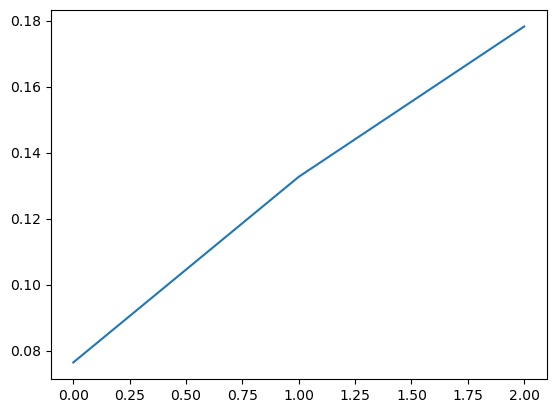

In [25]:
sns.lineplot(pca.explained_variance_ratio_.cumsum())

In [67]:
pca_result

array([[ 2.73887428, -2.3908636 , -1.27847469],
       [ 2.88384678,  2.44293336, -0.74810086],
       [ 2.88534121, -2.45791463, -1.426503  ],
       ...,
       [-1.52884011,  0.13151746,  1.89074385],
       [-1.66811935,  0.01066714, -0.75665826],
       [-1.56760346, -0.05853298, -1.31451396]])

In [26]:
# Create a DataFrame for the PCA result

pca_df = pd.DataFrame(data=pca_result, columns=['PC1','PC2','PC3'])
pca_df.head()

PC1       PC2       PC3
0  2.738874 -2.390864 -1.278475
1  2.883847  2.442933 -0.748101
2  2.885341 -2.457915 -1.426503
3  2.735787 -2.348351  2.158952
4  2.777538 -2.568415 -1.414249

# Elbow method for optimal number of clusters

In [56]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# Create a list to store the inertia values for different numbers of clusters
inertia = []

In [58]:
# Range of clusters to test
k_values = range(1, 8)

In [59]:
# Perform KMeans clustering for each value of k
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=24, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    

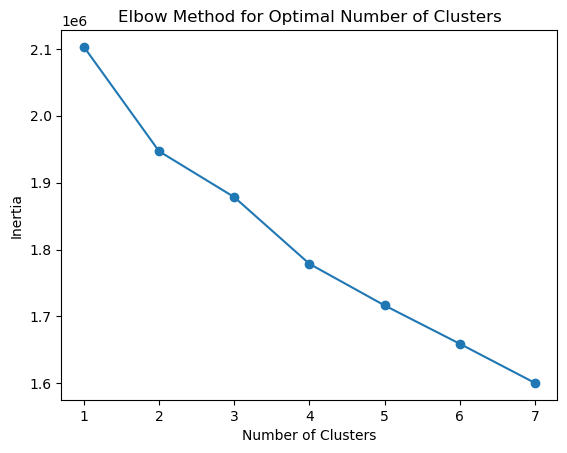

In [31]:
# Plot the inertia values against the number of clusters

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_values)
plt.show()

In [32]:
# inertia (sum distance): confirm visual clue of elbow plot


from kneed import KneeLocator
inertia_knee_c3 = KneeLocator(
        x=range(1,8), 
        y=inertia, 
        S=0.1, curve="convex", direction="decreasing", online=True)

K_inertia_c3 = inertia_knee_c3.elbow   
print("elbow at k =", f'{K_inertia_c3:.0f} clusters')

elbow at k = 4 clusters


# Clustering

In [62]:
from sklearn.cluster import KMeans

# Combine PCA result with original data


combined_data = pd.concat([pd.DataFrame(scaled_data, columns=encoded_data.columns), pd.DataFrame(pca_result, columns=['PC1', 'PC2','PC3'])], axis=1)

In [63]:
# Apply clustering algorithm k-means

kmeans = KMeans(n_clusters=4, n_init=10, random_state=24) 

clusters = kmeans.fit_predict(combined_data)

In [64]:
clusters

array([2, 1, 2, ..., 0, 3, 3])

In [65]:
# Evaluate clustering

combined_data = pd.concat([encoded_data, pd.DataFrame(pca_result, columns=['PC1', 'PC2','PC3'])], axis=1)

combined_data['Cluster'] = clusters
combined_data.head()

Shipping Cost  Order_Priority_Encoded  Segment_Consumer  Segment_Corporate  \
0           57.2                     4.0                 1                  0   
1           57.2                     4.0                 0                  1   
2           57.2                     2.0                 1                  0   
3           57.2                     2.0                 0                  0   
4           57.2                     4.0                 1                  0   

   Segment_Home Office  Category_Furniture  Category_Office Supplies  \
0                    0                   0                         0   
1                    0                   1                         0   
2                    0                   0                         0   
3                    1                   0                         0   
4                    0                   0                         0   

   Category_Technology  Sub-Category_Accessories  Sub-Category_Appliances  \
0                    1                         1                        0   
1                    0                         0                        0   
2                    1                         0                        0   
3                    1                         0                        0   
4                    1                         0                        0   

   Sub-Category_Art  Sub-Category_Binders  Sub-Category_Bookcases  \
0                 0                     0                       0   
1                 0                     0                       0   
2                 0                     0                       0   
3                 0                     0                       0   
4                 0                     0                       0   

   Sub-Category_Chairs  Sub-Category_Copiers  Sub-Category_Envelopes  \
0                    0                     0                       0   
1                    1                     0                       0   
2                    0                     0                       0   
3                    0                     0                       0   
4                    0                     1                       0   

   Sub-Category_Fasteners  Sub-Category_Furnishings  Sub-Category_Labels  \
0                       0                         0                    0   
1                       0                         0                    0   
2                       0                         0                    0   
3                       0                         0                    0   
4                       0                         0                    0   

   Sub-Category_Machines  Sub-Category_Paper  Sub-Category_Phones  \
0                      0                   0                    0   
1                      0                   0                    0   
2                      0                   0                    1   
3                      0                   0                    1   
4                      0                   0                    0   

   Sub-Category_Storage  Sub-Category_Supplies  Sub-Category_Tables  \
0                     0                      0                    0   
1                     0                      0                    0   
2                     0                      0                    0   
3                     0                      0                    0   
4                     0                      0                    0   

   Region_Africa  Region_Canada  Region_Caribbean  Region_Central  \
0              0              0                 0               0   
1              0              0                 0               0   
2              0              0                 0               0   
3              0              0                 0               1   
4              1              0                 0               0   

   Region_Central Asia  Region_EMEA  Region_East  Region_N

In [36]:
combined_data['Cluster'].value_counts()

Cluster
3    19287
1    11986
0    10141
2     9876
Name: count, dtype: int64

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

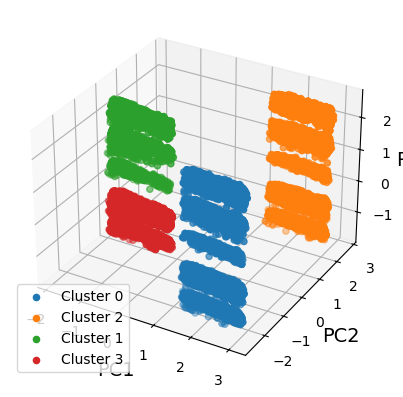

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for cluster in combined_data['Cluster'].unique():
    ax.scatter(combined_data.loc[combined_data['Cluster'] == cluster, 'PC1'],
                combined_data.loc[combined_data['Cluster'] == cluster, 'PC2'],
                combined_data.loc[combined_data['Cluster'] == cluster, 'PC3'],
                label=f'Cluster {cluster}')
    
ax.set_xlabel("PC1", fontsize=14)
ax.set_ylabel("PC2", fontsize=14)
ax.set_zlabel("PC3", fontsize=14)

ax.legend()
plt.show()
    


# Cluster Analysis

In [39]:
combined_data.groupby(['Cluster']).sum()

Shipping Cost  Order_Priority_Encoded  Segment_Consumer  \
Cluster                                                            
0            289905.48                 24454.0              5272   
1            114698.59                 28763.0              6068   
2            262126.90                 23650.0              5095   
3            190360.59                 46654.0             10083   

         Segment_Corporate  Segment_Home Office  Category_Furniture  \
Cluster                                                               
0                     3051                 1818                   0   
1                     3703                 2215                   0   
2                     3014                 1767                9876   
3                     5661                 3543                   0   

         Category_Office Supplies  Category_Technology  \
Cluster                                                  
0                               0                10141   
1                           11986                    0   
2                               0                    0   
3                           19287                    0   

         Sub-Category_Accessories  Sub-Category_Appliances  Sub-Category_Art  \
Cluster                                                                        
0                            3075                        0                 0   
1                               0                      651              1907   
2                               0                        0                 0   
3                               0                     1104              2976   

         Sub-Category_Binders  Sub-Category_Bookcases  Sub-Category_Chairs  \
Cluster                                                                      
0                           0                       0                    0   
1                        2383                       0                    0   
2                           0                    2411                 3434   
3                        3769                       0                    0   

         Sub-Category_Copiers  Sub-Category_Envelopes  Sub-Category_Fasteners  \
Cluster                                                                         
0                        2223                       0                       0   
1                           0                     894                     953   
2                           0                       0                       0   
3                           0                    1541                    1467   

         Sub-Category_Furnishings  Sub-Category_Labels  Sub-Category_Machines  \
Cluster                                                                         
0                               0                    0                   1486   
1                               0                  984                      0   
2                            3170                    0                      0   
3                               0                 1622                      0   

         Sub-Category_Paper  Sub-Category_Phones  Sub-Category_Storage  \
Cluster                                                                  
0                         0                 3357                     0   
1                      1352                    0                  1934   
2                         0                    0                     0   
3                      2186                    0                  3125   

         Sub-Category_Supplies  Sub-Category_Tables  Region_Africa  \
Cluster                                                              
0                            0                    0            911   
1                          928                    0           1184   
2                            0                  861            631   
3                         1497                    0           1861   

         Region_Canada  Region_Car

In [90]:
selected_variables = ['Category_Technology', 'Category_Furniture', 'Category_Office Supplies']

In [41]:
combined_data.groupby(['Cluster'])[selected_variables].sum()

Category_Technology  Category_Furniture  Category_Office Supplies
Cluster                                                                   
0                      10141                   0                         0
1                          0                   0                     11986
2                          0                9876                         0
3                          0                   0                     19287

In [92]:
selected_variables = ['Sub-Category_Phones', 'Sub-Category_Chairs','Sub-Category_Binders','Sub-Category_Paper',
                      'Sub-Category_Storage','Sub-Category_Accessories',
                      'Sub-Category_Tables','Sub-Category_Bookcases']

In [160]:
combined_data.groupby(['Cluster'])[selected_variables].sum()

Sub-Category_Phones  Sub-Category_Chairs  Sub-Category_Binders  \
Cluster                                                                   
0                       3357                    0                     0   
1                          0                    0                  2383   
2                          0                 3434                     0   
3                          0                    0                  3769   

         Sub-Category_Paper  Sub-Category_Storage  Sub-Category_Accessories  \
Cluster                                                                       
0                         0                     0                      3075   
1                      1352                  1934                         0   
2                         0                     0                         0   
3                      2186                  3125                         0   

         Sub-Category_Tables  Sub-Category_Bookcases  
Cluster                                               
0                          0                       0  
1                          0                       0  
2                        861                    2411  
3                          0                       0

In [114]:
selected_variables = [c for c in encoded_data.columns if c.startswith("Region")]
selected_variables

['Region_Africa',
 'Region_Canada',
 'Region_Caribbean',
 'Region_Central',
 'Region_Central Asia',
 'Region_EMEA',
 'Region_East',
 'Region_North',
 'Region_North Asia',
 'Region_Oceania',
 'Region_South',
 'Region_Southeast Asia',
 'Region_West']

In [162]:
region_sum = combined_data.groupby(['Cluster'])[selected_variables].sum()
region_sum

Region_Africa  Region_Canada  Region_Caribbean  Region_Central  \
Cluster                                                                   
0                  911             65               341            2135   
1                 1184             82               360            2770   
2                  631             42               376            2046   
3                 1861            195               613            4166   

         Region_Central Asia  Region_EMEA  Region_East  Region_North  \
Cluster                                                                
0                        459          962          535           926   
1                        390         1334          664          1006   
2                        478          770          601           945   
3                        721         1963         1048          1908   

         Region_North Asia  Region_Oceania  Region_South  \
Cluster                                                    
0                      484             784          1271   
1                      521             709          1569   
2                      522             742          1329   
3                      811            1252          2476   

         Region_Southeast Asia  Region_West  
Cluster                                      
0                          669          599  
1                          707          690  
2                          687          707  
3                         1066         1207

In [163]:
# Calculate the percentage of each region in each cluster

cluster_sum = region_sum.sum(axis=1)

cluster_region_percentage = region_sum.div(cluster_sum, axis=0) * 100
cluster_region_percentage


Region_Africa  Region_Canada  Region_Caribbean  Region_Central  \
Cluster                                                                   
0             8.983335       0.640962          3.362588       21.053151   
1             9.878191       0.684131          3.003504       23.110295   
2             6.389226       0.425273          3.807209       20.716889   
3             9.648986       1.011044          3.178307       21.600041   

         Region_Central Asia  Region_EMEA  Region_East  Region_North  \
Cluster                                                                
0                   4.526181     9.486244     5.275614      9.131249   
1                   3.253796    11.129651     5.539796      8.393125   
2                   4.840016     7.796679     6.085460      9.568651   
3                   3.738269    10.177840     5.433712      9.892674   

         Region_North Asia  Region_Oceania  Region_South  \
Cluster                                                    
0                 4.772705        7.730993     12.533281   
1                 4.346738        5.915234     13.090272   
2                 5.285541        7.513163     13.456865   
3                 4.204905        6.491419     12.837663   

         Region_Southeast Asia  Region_West  
Cluster                                      
0                     6.596983     5.906715  
1                     5.898548     5.756716  
2                     6.956258     7.158769  
3                     5.527039     6.258101

<Figure size 1000x600 with 0 Axes>

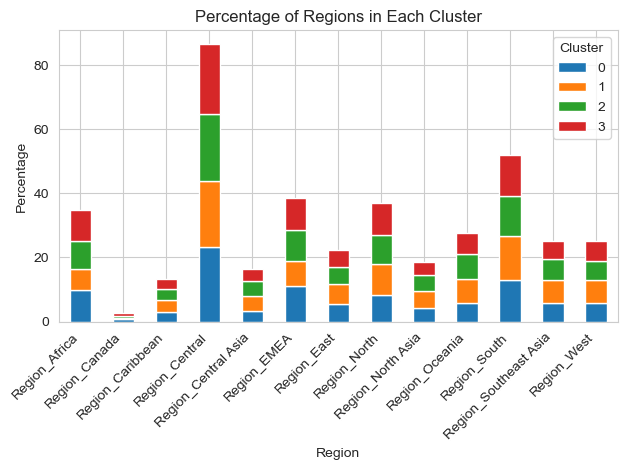

In [117]:
# Stacked bar plot for all clusters 

# Transpose the DataFrame to have clusters as columns and regions as rows
cluster_region_percentage_transposed = cluster_region_percentage.T

# Plot a stacked bar plot
plt.figure(figsize=(10, 6))
cluster_region_percentage_transposed.plot(kind='bar', stacked=True)
plt.title('Percentage of Regions in Each Cluster')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [168]:
# Filter and sort the data for cluster 0
cluster_0_percentage = cluster_region_percentage.loc[0].sort_values(ascending=False)

print("Cluster 0:")
print(cluster_0_percentage)

Cluster 0:
Region_Central           21.053151
Region_South             12.533281
Region_EMEA               9.486244
Region_North              9.131249
Region_Africa             8.983335
Region_Oceania            7.730993
Region_Southeast Asia     6.596983
Region_West               5.906715
Region_East               5.275614
Region_North Asia         4.772705
Region_Central Asia       4.526181
Region_Caribbean          3.362588
Region_Canada             0.640962
Name: 0, dtype: float64


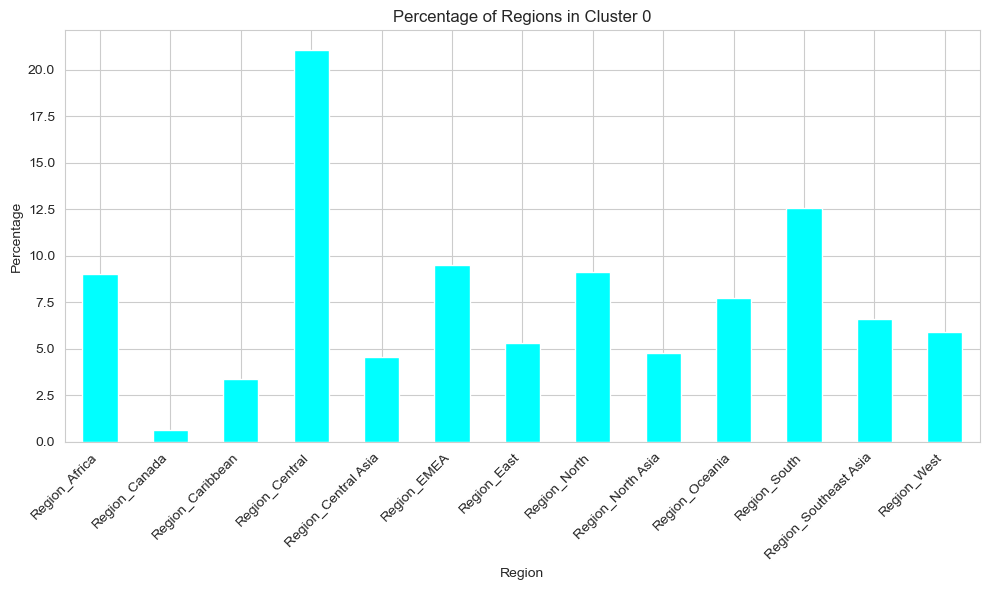

In [169]:
# Bar plot for Cluster 0
cluster_0_data = cluster_region_percentage_transposed[0]


plt.figure(figsize=(10, 6))
cluster_0_data.plot(kind='bar', color= 'cyan')
plt.title('Percentage of Regions in Cluster 0')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [63]:
# Filter and sort the data for cluster 1
cluster_1_percentage = cluster_region_percentage.loc[1].sort_values(ascending=False)

print("Cluster 1:")
print(cluster_1_percentage)

Cluster 1:
Region_Central           22.178876
Region_South             12.934480
Region_EMEA              10.542641
Region_Africa             9.736834
Region_North              9.317942
Region_Oceania            6.270585
Region_West               6.065935
Region_Southeast Asia     5.669427
Region_East               5.474371
Region_North Asia         4.259265
Region_Central Asia       3.552585
Region_Caribbean          3.111310
Region_Canada             0.885748
Name: 1, dtype: float64


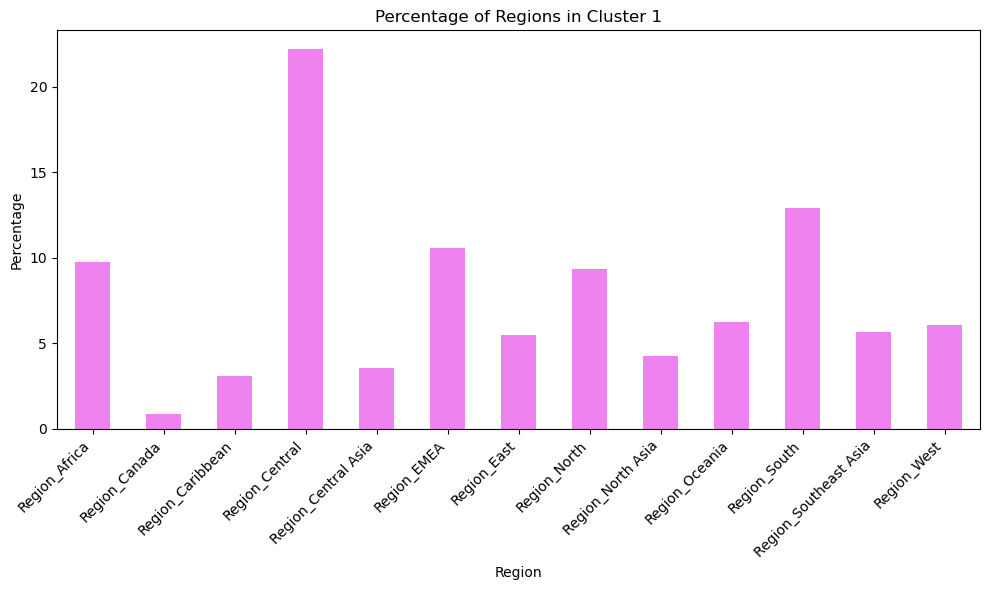

In [66]:
# Bar plot for Cluster 1
cluster_1_data = cluster_region_percentage_transposed[1]

plt.figure(figsize=(10, 6))
cluster_1_data.plot(kind='bar',color ='violet' )
plt.title('Percentage of Regions in Cluster 1')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [64]:
# Filter and sort the data for cluster 2
cluster_2_percentage = cluster_region_percentage.loc[2].sort_values(ascending=False)

print("Cluster 2:")
print(cluster_2_percentage)

Cluster 2:
Region_Central           20.716889
Region_South             13.456865
Region_North              9.568651
Region_EMEA               7.796679
Region_Oceania            7.513163
Region_West               7.158769
Region_Southeast Asia     6.956258
Region_Africa             6.389226
Region_East               6.085460
Region_North Asia         5.285541
Region_Central Asia       4.840016
Region_Caribbean          3.807209
Region_Canada             0.425273
Name: 2, dtype: float64


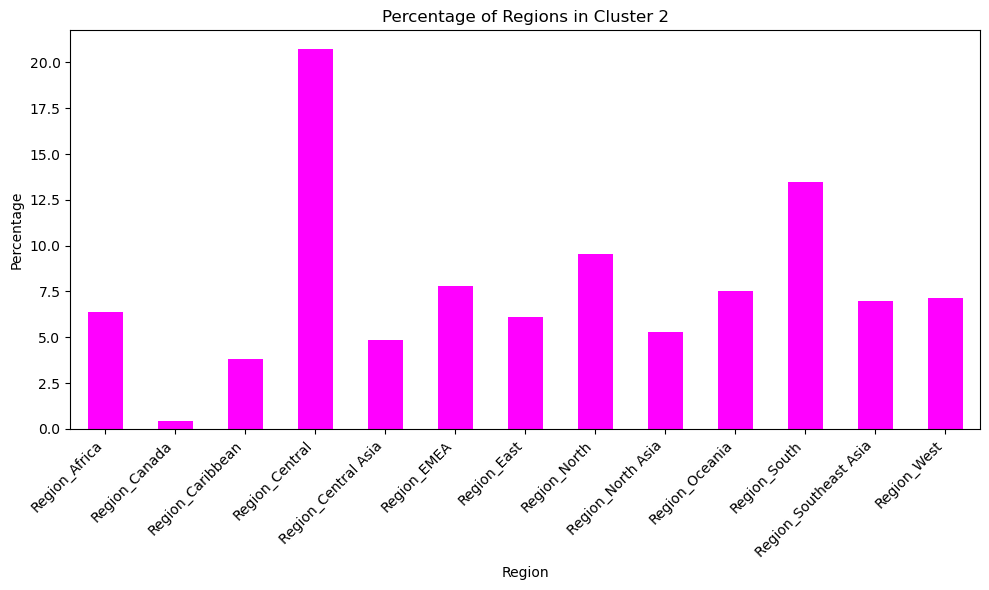

In [67]:
# Bar plot for Cluster 2
cluster_2_data = cluster_region_percentage_transposed[2]

plt.figure(figsize=(10, 6))
cluster_2_data.plot(kind='bar',color='magenta')
plt.title('Percentage of Regions in Cluster 2')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [186]:
# Filter and sort the data for cluster 3
cluster_3_percentage = cluster_region_percentage.loc[3].sort_values(ascending=False)

print("Cluster 3:")
print(cluster_3_percentage)

Cluster 3:
Region_Central           21.600041
Region_South             12.837663
Region_EMEA              10.177840
Region_North              9.892674
Region_Africa             9.648986
Region_Oceania            6.491419
Region_West               6.258101
Region_Southeast Asia     5.527039
Region_East               5.433712
Region_North Asia         4.204905
Region_Central Asia       3.738269
Region_Caribbean          3.178307
Region_Canada             1.011044
Name: 3, dtype: float64


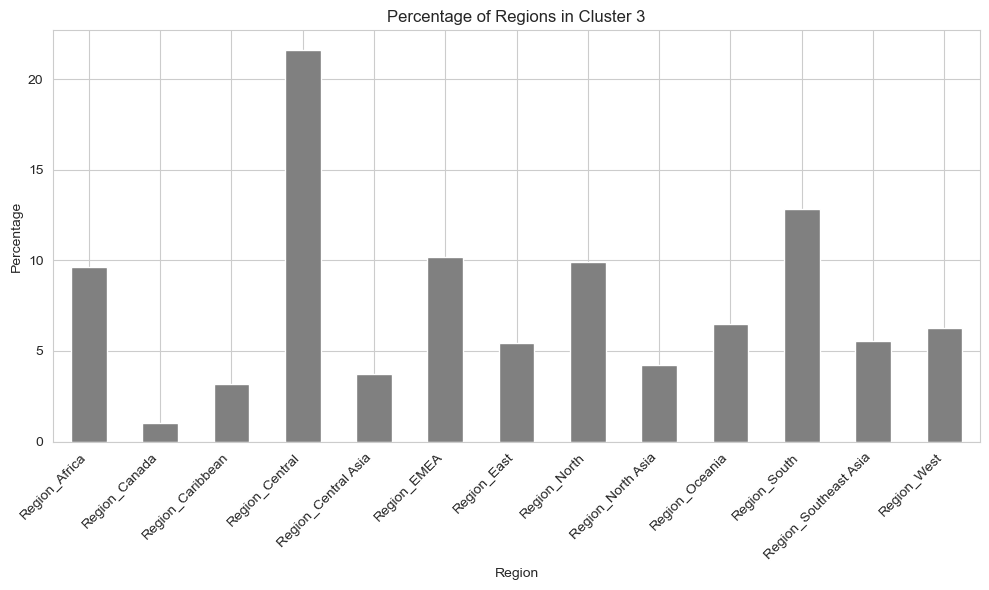

In [172]:
# Bar plot for Cluster 3
cluster_3_data = cluster_region_percentage_transposed[3]

plt.figure(figsize=(10, 6))
cluster_3_data.plot(kind='bar',color='grey')
plt.title('Percentage of Regions in Cluster 3')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [173]:
#stats of categorical data by mode

combined_data.groupby(['Cluster']).agg(lambda x: pd.Series.mode(x).iat[0])[['Category_Technology', 'Category_Furniture','Category_Office Supplies']]


Category_Technology  Category_Furniture  Category_Office Supplies
Cluster                                                                   
0                          1                   0                         0
1                          0                   0                         1
2                          0                   1                         0
3                          0                   0                         1

In [174]:
#stats of categorical data by mode

combined_data.groupby(['Cluster']).agg(lambda x: pd.Series.mode(x).iat[0])[['gender_M', 'gender_F','gender_Unknown']]


gender_M  gender_F  gender_Unknown
Cluster                                    
0               1         0               0
1               0         1               0
2               1         0               0
3               1         0               0

In [175]:
combined_data.groupby(['Cluster']).agg(lambda x: pd.Series.mode(x).iat[0])[['Order_Priority_Encoded']]

Order_Priority_Encoded
Cluster                        
0                           2.0
1                           2.0
2                           2.0
3                           2.0

# Classification with SVM and Random Forest

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [71]:
encoded_data.columns

Index(['Shipping Cost', 'Order_Priority_Encoded', 'Segment_Consumer',
       'Segment_Corporate', 'Segment_Home Office', 'Category_Furniture',
       'Category_Office Supplies', 'Category_Technology',
       'Sub-Category_Accessories', 'Sub-Category_Appliances',
       'Sub-Category_Art', 'Sub-Category_Binders', 'Sub-Category_Bookcases',
       'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Envelopes',
       'Sub-Category_Fasteners', 'Sub-Category_Furnishings',
       'Sub-Category_Labels', 'Sub-Category_Machines', 'Sub-Category_Paper',
       'Sub-Category_Phones', 'Sub-Category_Storage', 'Sub-Category_Supplies',
       'Sub-Category_Tables', 'Region_Africa', 'Region_Canada',
       'Region_Caribbean', 'Region_Central', 'Region_Central Asia',
       'Region_EMEA', 'Region_East', 'Region_North', 'Region_North Asia',
       'Region_Oceania', 'Region_South', 'Region_Southeast Asia',
       'Region_West', 'gender_F', 'gender_M', 'gender_Unknown'],
      dtype='object')

In [176]:
# Variables for classification model (Category, Sub-Category, Region, Shipping Cost)

selected_variables = [c for c in encoded_data.columns 
                      if c.startswith('Category') or c.startswith('Sub-Category') or c.startswith('Region') ]
selected_variables.append('Shipping Cost')

In [177]:
X = combined_data[selected_variables]
Y = combined_data['Cluster']

In [178]:
# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=24)


In [179]:
# Add a function for classification with svm (linear, poly, rbf kernel)

def evaluate_classifier(X_train, X_test, Y_train, Y_test, classifier='svm', kernel='rbf', degree=3, gamma=0.5, C=0.1):
    if kernel == 'poly':
            clf = SVC(kernel='poly', degree=degree, C=C)
    elif kernel == 'rbf':
            clf = SVC(kernel='rbf', gamma=gamma, C=C)
    else:
            clf = SVC(kernel='linear')

    
    # Fit the model on training data
    clf.fit(X_train, Y_train)
    
    # Make predictions on test data
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')

    # Create a DataFrame to store the results
    results = pd.DataFrame({
        'Classifier': [f"{classifier.capitalize()} - {kernel.capitalize()} Kernel"],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1]
    })
    
    return results
    

In [50]:
# Call the function for svm-linear

svm_linear = evaluate_classifier(X_train, X_test, Y_train, Y_test, classifier='svm', kernel='linear')
svm_linear

Classifier  Accuracy  Precision    Recall  F1-Score
0  Svm - Linear Kernel  0.764769   0.619194  0.764769  0.674845

In [48]:
# Call the function for svm-poly
svm_poly= evaluate_classifier(X_train, X_test, Y_train, Y_test, classifier='svm', kernel='poly', degree=3, C=1)
svm_poly

Classifier  Accuracy  Precision    Recall  F1-Score
0  Svm - Poly Kernel  0.623123   0.575072  0.623123  0.551504

In [49]:
# Call the function for svm-rbf
svm_rbf= evaluate_classifier(X_train, X_test, Y_train, Y_test, classifier='svm', kernel='rbf', gamma=0.5, C=0.1)
svm_rbf

Classifier  Accuracy  Precision    Recall  F1-Score
0  Svm - Rbf Kernel  0.764769   0.619194  0.764769  0.674845

In [51]:
# Initialize an empty DataFrame to store all svm results

svm_results = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [52]:
# Concatenate the empty dataframe with columns with dataframes with svm results

svm_results = pd.concat([svm_results, svm_linear, svm_poly, svm_rbf], ignore_index=True)
svm_results

Classifier  Accuracy  Precision    Recall  F1-Score
0  Svm - Linear Kernel  0.764769   0.619194  0.764769  0.674845
1    Svm - Poly Kernel  0.623123   0.575072  0.623123  0.551504
2     Svm - Rbf Kernel  0.764769   0.619194  0.764769  0.674845

In [182]:
#Random Forest 

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=24)
 
# Train the classifier
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=24)

In [183]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [184]:
# Evaluate the model
rf_accuracy = accuracy_score(Y_test, y_pred)
rf_precision = precision_score(Y_test, y_pred, average='weighted')
rf_recall = recall_score(Y_test, y_pred, average='weighted')
rf_f1 = f1_score(Y_test, y_pred, average='weighted')


In [56]:
# Create a dataframe with rf results 

rf_results = pd.DataFrame({
    'Classifier': ['Random Forest'],
    'Accuracy': [rf_accuracy],
    'Precision':[rf_precision],
    'Recall':[rf_recall],
    'F1-Score': [rf_f1]
})

rf_results

Classifier  Accuracy  Precision    Recall  F1-Score
0  Random Forest  0.706083   0.703023  0.706083  0.704427

In [57]:
# Concatenate svm results with rf results in all_results dataframe

all_results = pd.concat([svm_results, rf_results], ignore_index=True)
all_results

Classifier  Accuracy  Precision    Recall  F1-Score
0  Svm - Linear Kernel  0.764769   0.619194  0.764769  0.674845
1    Svm - Poly Kernel  0.623123   0.575072  0.623123  0.551504
2     Svm - Rbf Kernel  0.764769   0.619194  0.764769  0.674845
3        Random Forest  0.706083   0.703023  0.706083  0.704427

In [58]:
# Feature Importance Plot

feature_importance_rf = rf_classifier.feature_importances_

In [59]:
feature_names = X.columns

In [60]:
# Sort features by importance

sorted_indices = np.argsort(feature_importance_rf)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importances = feature_importance_rf[sorted_indices]


In [61]:
# Create interactive bar plot

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Bar(x=sorted_features, y=sorted_importances, marker=dict(color='magenta')),
              row=1, col=1)

In [62]:
# Update layout
fig.update_layout(title='Feature Importance',
                  xaxis_title='Feature',
                  yaxis_title='Importance',
                  height=600)


fig.show()

# Random forest regression

In [72]:

import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [73]:
# One-hot encoding

encoded_data1= pd.get_dummies(new_df, columns=['Category'], dtype=int)

In [74]:
encoded_data1.drop(columns=['Row ID','Order ID','Ship Date','Product ID','Product Name','Order Priority','Customer Name',
                            'Customer ID','Order Date','State','Market','City','Ship Mode','Segment','Country'], inplace=True)

In [75]:
encoded_data1.head()

Region Sub-Category  Sales  Quantity  Discount   Profit  Shipping Cost  \
0     East  Accessories  581.4         7       0.0  91.9954           57.2   
1  Oceania       Chairs  581.4         9       0.1 -55.1250           57.2   
2  Oceania       Phones  581.4         9       0.1  91.9954           57.2   
3  Central       Phones  581.4         5       0.1 -55.1250           57.2   
4   Africa      Copiers  581.4         8       0.0  91.9954           57.2   

  gender  Order_year  Order_month  Order_day  Order_Priority_Encoded  \
0      M        2012            7         31                     4.0   
1      M        2013            2          5                     4.0   
2      M        2013           10         17                     2.0   
3      F        2013            1         28                     2.0   
4      M        2013           11          5                     4.0   

   Category_Furniture  Category_Office Supplies  Category_Technology  
0                   0                         0                    1  
1                   1                         0                    0  
2                   0                         0                    1  
3                   0                         0                    1  
4                   0                         0                    1

In [76]:
X= encoded_data1[['Profit','Discount','Quantity','Shipping Cost','Category_Technology','Category_Office Supplies','Category_Furniture','Order_year']]
y=encoded_data1['Sales']

In [77]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
 
# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=24)

In [78]:
# Train the regressor
rf_regressor.fit(X_train, y_train)
 
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

In [117]:
# Evaluate the model (numeric + category + order year)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 
# Print the results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 5064.37
R-squared Score: 0.86


In [118]:
# Interaction Plot for feature importance (to find out the most significant features)

feature_importance_rf = rf_regressor.feature_importances_

In [119]:
feature_names = X.columns

In [120]:
# Sort features by importance
sorted_indices = np.argsort(feature_importance_rf)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importances = feature_importance_rf[sorted_indices]

In [121]:
# Create interactive bar plot
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Bar(x=sorted_features, y=sorted_importances, marker=dict(color='magenta')),
              row=1, col=1)

In [122]:
# Update layout
fig.update_layout(title='Feature Importance',
                  xaxis_title='Feature',
                  yaxis_title='Importance',
                  height=600)


fig.show()


In [123]:
# Interactive plot for predicted vs actual values

import plotly.graph_objs as go

In [124]:
# Create a scatter plot
trace = go.Scatter(x=y_test, y=y_pred, mode='markers', marker=dict(color='magenta'))


In [125]:
# Add a diagonal line representing perfect predictions
diag_line = go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines', name='Perfect Predictions', line=dict(color='cyan'))

In [126]:
# Create layout
layout = go.Layout(title='Predicted vs Actual Values',
                   xaxis=dict(title='Actual Values'),
                   yaxis=dict(title='Predicted Values'),
                   showlegend=True)

In [127]:
# Create figure
fig = go.Figure(data=[trace, diag_line], layout=layout)

In [128]:
# Add hover text with additional information
hover_text = [f'Actual: {a}<br>Predicted: {p}' for a, p in zip(y_test, y_pred)]
fig.data[0].update(text=hover_text, hoverinfo='text')

fig.show()

In [129]:
# Cross-validation for random forest regression

from sklearn.model_selection import cross_val_score

In [130]:
# Perform cross-validation
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')


In [131]:
# Convert the negative mean squared errors to positive values
cv_scores = -cv_scores


In [132]:

print("Cross-Validation Scores:")
print(cv_scores)


Cross-Validation Scores:
[5266.8541527  5069.63920654 5330.41844147 5170.07318476 5430.57605148]


In [133]:
# Calculate the mean and standard deviation of the cross-validation scores

mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print(f"\nMean Cross-Validation Score: {mean_cv_score:.2f}")
print(f"Standard Deviation of Cross-Validation Scores: {std_cv_score:.2f}")


Mean Cross-Validation Score: 5253.51
Standard Deviation of Cross-Validation Scores: 125.07


In [ ]:
# Now, we will isolate Random products from  dataset and predict the sales.
# For this reason, I will create a new subset (newdf2 = numeric variables + Product ID + Product Name + 
# + Order_year + Category(OF.S, Technology,Furniture))

In [80]:
# One-hot encoding

newdf2= pd.get_dummies(new_df, columns=['Category'], dtype=int)

In [81]:
newdf2.drop(columns=['Row ID','Order ID','Ship Date','Order Priority','Customer Name','Customer ID',
                     'Order Date','State','Market','City','Ship Mode','Segment','Country','Region','gender',
                     'Order_Priority_Encoded','Sub-Category','Order_month'], inplace=True)

In [82]:
newdf2.head()

Product ID                                       Product Name  Sales  \
0   TEC-AC-10003033  Plantronics CS510 - Over-the-Head monaural Wir...  581.4   
1   FUR-CH-10003950          Novimex Executive Leather Armchair, Black  581.4   
2   TEC-PH-10004664                  Nokia Smart Phone, with Caller ID  581.4   
3   TEC-PH-10004583                     Motorola Smart Phone, Cordless  581.4   
4  TEC-SHA-10000501                     Sharp Wireless Fax, High-Speed  581.4   

   Quantity  Discount   Profit  Shipping Cost  Order_year  Order_day  \
0         7       0.0  91.9954           57.2        2012         31   
1         9       0.1 -55.1250           57.2        2013          5   
2         9       0.1  91.9954           57.2        2013         17   
3         5       0.1 -55.1250           57.2        2013         28   
4         8       0.0  91.9954           57.2        2013          5   

   Category_Furniture  Category_Office Supplies  Category_Technology  
0                   0                         0                    1  
1                   1                         0                    0  
2                   0                         0                    1  
3                   0                         0                    1  
4                   0                         0                    1

In [83]:
# Isolate 5 Random  products from dataset

random_products = newdf2.sample(n=5)

In [84]:
random_products

Product ID                       Product Name    Sales  Quantity  \
9863    OFF-ST-10000695         Rogers Lockers, Wire Frame  252.828         2   
35090   OFF-FA-10003659  Accos Paper Clips, Assorted Sizes   18.384         3   
36523  OFF-ACC-10004692        Acco 3-Hole Punch, Recycled  121.920         4   
10484  OFF-STA-10003803  Stanley Highlighters, Fluorescent  127.680         8   
21681   OFF-LA-10003511     Avery Round Labels, Adjustable   35.280         7   

       Discount  Profit  Shipping Cost  Order_year  Order_day  \
9863        0.4 -55.125          33.46        2014         20   
35090       0.2  -4.596           3.56        2011         11   
36523       0.0  10.920           3.14        2012         24   
10484       0.0  47.040          31.07        2014          3   
21681       0.0   5.880          10.83        2013         20   

       Category_Furniture  Category_Office Supplies  Category_Technology  
9863                    0                         1                    0  
35090                   0                         1                    0  
36523                   0                         1                    0  
10484                   0                         1                    0  
21681                   0                         1                    0

In [85]:
# Make predictions

new_product_sales = rf_regressor.predict(random_products[['Profit','Discount','Quantity','Shipping Cost','Category_Technology','Category_Office Supplies','Category_Furniture','Order_year']])

In [86]:
# Display the predicted sales

print("Predicted Sales for New Products:")
print(new_product_sales)

Predicted Sales for New Products:
[262.58925   39.978301  91.13532  149.300336  49.83764 ]


In [87]:
# Display the product names/ID

product_names= random_products['Product ID']
product_names

9863      OFF-ST-10000695
35090     OFF-FA-10003659
36523    OFF-ACC-10004692
10484    OFF-STA-10003803
21681     OFF-LA-10003511
Name: Product ID, dtype: object

In [88]:
#Display the actual sales

actual_sales = random_products['Sales']
actual_sales

9863     252.828
35090     18.384
36523    121.920
10484    127.680
21681     35.280
Name: Sales, dtype: float64

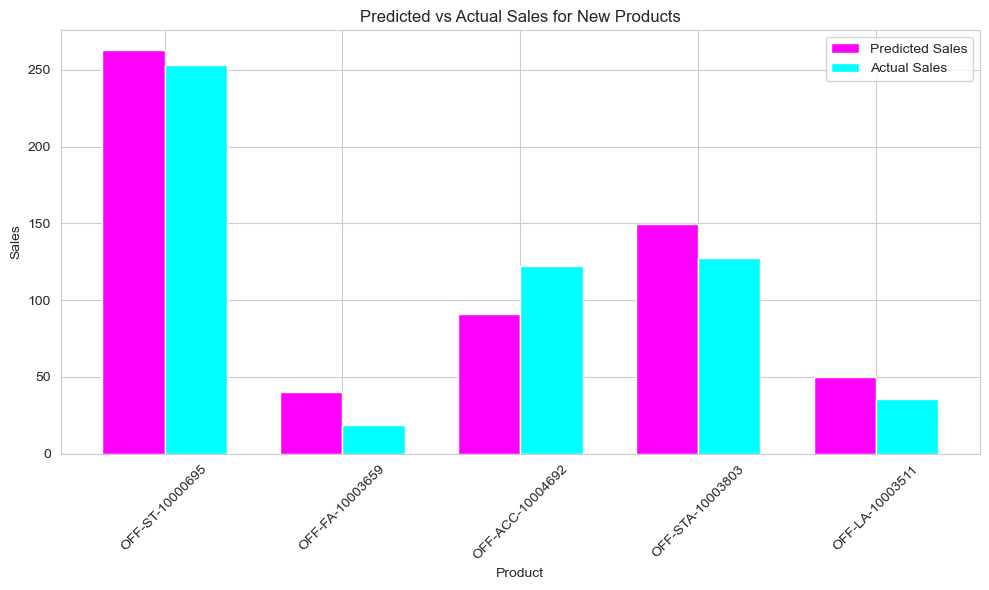

In [89]:
# Plotting predicted and actual sales
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(product_names))

# Plotting predicted sales
predicted_bar = ax.bar(index, new_product_sales, bar_width, label='Predicted Sales', color='magenta')

# Plotting actual sales
actual_bar = ax.bar(index + bar_width, actual_sales, bar_width, label='Actual Sales', color='cyan')

# Adding labels and title
ax.set_xlabel('Product')
ax.set_ylabel('Sales')
ax.set_title('Predicted vs Actual Sales for New Products')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(product_names, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()